<a href="https://colab.research.google.com/github/Abdullah-Sada/AI-Assignment/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def _remyu(self, X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[X[:, -1] == j, :-1], axis=0)


    def _reclustering(self, X):
        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.n_clusters):
                dist = np.sqrt(np.sum((X[i, :-1] - self.myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i, -1] = j

    def _sse(self, X):
        sse = 0
        for i in range(len(X)):
            for j in range(self.n_clusters):
                if j == X[i, -1]:
                    sse += np.sum((X[i, :-1] - self.myu[j])**2)
        if self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu
            self.record_cluster = self.n_clusters

    def _silhouette(self, X):
        return

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        self.best_sse = 10**10
        for k in range(self.n_init):
            # Initial setting for the center point μk for the number of clusters
            self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
            # Set the clustered value
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)

            for ite in range(self.max_iter):
                self._reclustering(X_cluster)
                old_myu = self.myu.copy()
                self._remyu(X_cluster)

                # Output the learning process when verbose is set to True
                if self.verbose:
                    plt.figure(figsize=(10, 8))
                    plt.rcParams["font.size"] = 20

                    for i in range(self.n_clusters):
                        plt.scatter(X[X_cluster[:, -1] == i, 0], X[X_cluster[:, -1] == i, 1], s=80)
                    plt.scatter(self.myu[:, 0], self.myu[:, 1], s=100, c='red')
                    plt.show()

                # Iteration continuation judgement
                if np.sum(np.abs(old_myu - self.myu)) < self.tol:
                    self._sse(X_cluster)
                    break

                self._sse(X_cluster)

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**10
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i] - self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred



In [24]:
class ScratchKMeans_speed():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters=2, n_init=20, max_iter=100, tol=1e-5, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

    def _remyu(self, X):
        for j in range(self.n_clusters):
            self.myu[j] = np.mean(X[self.cluster == j], axis=0)

    def _reclustering(self, X):
        diff = (X - self.myu[:, None]).reshape(-1, X.shape[1])
        self.dist = np.linalg.norm(diff, ord=2, axis=1).reshape(self.n_clusters, -1).T
        self.cluster = np.argmin(self.dist, axis=1)

    def _sse(self, X):
        diff = (X - self.myu[:, None]).reshape(-1, X.shape[1])
        self.dist = np.linalg.norm(diff, ord=2, axis=1).reshape(self.n_clusters, -1).T
        sse = np.sum(np.min(self.dist, axis=1) ** 2)

        if not hasattr(self, 'best_sse') or self.best_sse > sse:
            self.best_sse = sse
            self.record_myu = self.myu.copy()
            self.record_cluster = self.n_clusters
            if self.n_clusters >= 2:
                self._silhouette(X)

    def _silhouette(self, X):
        ab = np.zeros([len(X), 2])
        self.silhouette_vals = np.zeros(len(X))

        for i, j in enumerate(X):
            a = np.sum(np.linalg.norm(j - X[self.cluster == self.cluster[i]], ord=2, axis=1)) / (len(X[self.cluster == self.cluster[i]]) - 1)
            b = np.mean(np.linalg.norm(j - X[self.cluster == self.dist[i].argsort()[1]], ord=2, axis=1))
            self.silhouette_vals[i] = (b - a) / max(a, b)

        self.silhouette_avg = np.mean(self.silhouette_vals)
        self.y_kn = self.cluster
        self.cluster_labels = np.unique(self.cluster)

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for k in range(self.n_init):
            # Initial setting for the center point μk for the number of clusters
            self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]

            for ite in range(self.max_iter):
                self._reclustering(X)
                old_myu = self.myu.copy()
                self._remyu(X)

                # Output the learning process when verbose is set to True
                if self.verbose:
                    plt.figure(figsize=(10, 8))
                    plt.rcParams["font.size"] = 20
                    for i in range(self.n_clusters):
                        plt.scatter(X[self.cluster == i, 0], X[self.cluster == i, 1], s=80)
                    plt.scatter(self.myu[:, 0], self.myu[:, 1], s=100, c='red')
                    plt.show()

                # Iteration continuation judgement
                if np.sum(np.abs(old_myu - self.myu)) < self.tol:
                    self._sse(X)
                    break

                self._sse(X)

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        diff = (X - self.record_myu[:, None]).reshape(-1, X.shape[1])
        dist = np.linalg.norm(diff, ord=2, axis=1).reshape(self.record_cluster, -1).T
        return np.argmin(dist, axis=1)


In [25]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [26]:
X.shape

(100, 2)

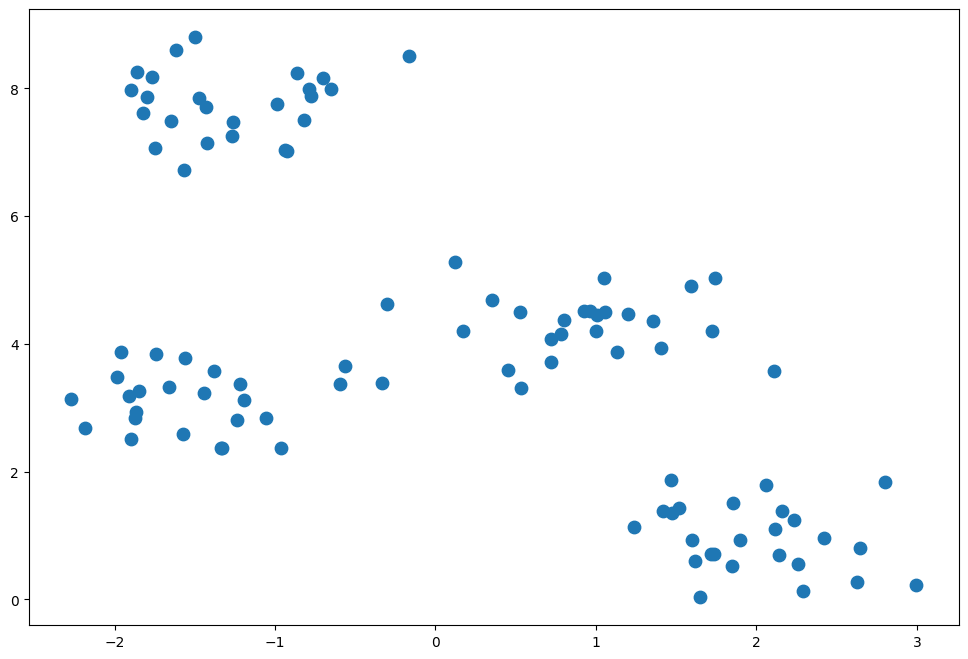

In [27]:
# Data Distribution Visualization
plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:, 0], X[:, 1], s=80)
plt.show()



### Problem 1: Determine the initial value of the center point

In [28]:
# Select K randomly
k = 2
myu = X[np.random.choice(len(X), size=k, replace=False)]
print(myu.shape)
print(myu)


(2, 2)
[[-1.37778493  3.58107521]
 [ 2.79939362  1.84560825]]


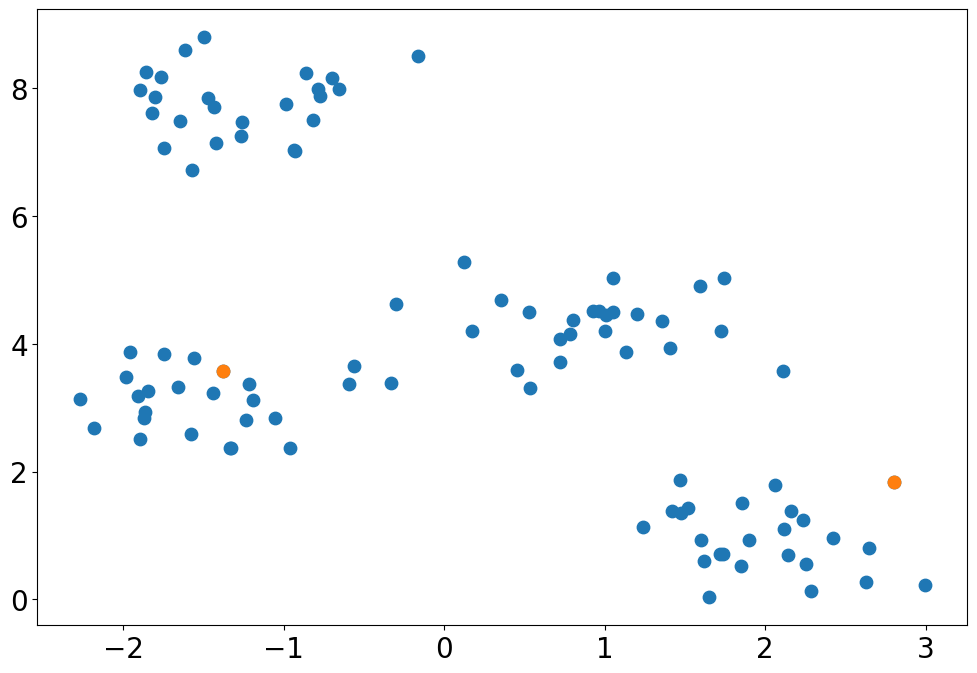

In [29]:
# Data Distribution Visualization
plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:, 0], X[:, 1], s=80)
plt.scatter(myu[:,0],myu[:,1],s=80)
plt.show()

### Problem 2: Creation of a function to obtain SSE

In [30]:
num = 10
k = 2

# Add a label for verification
label = np.random.randint(0, k, len(X[0:num]))
X_test = np.concatenate([X[0:num], label.reshape(-1, 1)], axis=1)

print(X_test.shape)
print(X_test)


(10, 3)
[[ 0.72086751  3.71347124  1.        ]
 [-1.89468423  7.96898545  0.        ]
 [ 1.35678894  4.36462484  0.        ]
 [ 1.05374379  4.49286859  1.        ]
 [ 1.59141542  4.90497725  1.        ]
 [ 0.78260667  4.15263595  0.        ]
 [-1.95751686  3.87291474  0.        ]
 [-0.77354537  7.87923564  1.        ]
 [ 0.12313498  5.27917503  0.        ]
 [-1.43284669  7.71577043  1.        ]]


In [31]:
# Calculating Euclidean Distance
np.sqrt(np.sum((X[0]-myu[0])**2))

2.1028244706234838

In [32]:
# Calculated in L2 norm
np.linalg.norm(X[0]-myu[0],ord=2)

2.1028244706234838

In [33]:
# SSE Small test
for i in range (5):
  for j in range(len(myu)):
    if j == X_test[i,2]:
      sse = np.sqrt(np.sum((X_test[i,0:2]-myu[j])**2))
  print(sse)

2.7944915322518167
4.418250917484974
2.844616714395624
3.1710062475958027
3.289217237006632


In [34]:
# Calculated in L2 norm
for i in range (5):
  for j in range(len(myu)):
    if j == X_test[i,2]:
      sse = np.linalg.norm(X_test[i,0:2]-myu[j])
  print(sse)

2.7944915322518167
4.418250917484974
2.844616714395624
3.1710062475958027
3.289217237006632


### Problem 3: Allocation to cluster

In [35]:
# Re-clustering Small test
for i in range(5):
    dist_m = 10**10
    for j in range(len(myu)):
        dist = np.sqrt(np.sum((X_test[i, :-1] - myu[j])**2))
        print(dist)
        if dist < dist_m:
            dist_m = dist
            X_test[i, -1] = j
    print('New_Label:', X_test[i, -1])


2.1028244706234838
2.7944915322518167
New_Label: 0.0
4.418250917484974
7.715576142124826
New_Label: 0.0
2.844616714395624
2.902852532256394
New_Label: 0.0
2.596863313206943
3.1710062475958027
New_Label: 0.0
3.2509794379798236
3.289217237006632
New_Label: 0.0


In [36]:
# Re-clustering Small test
dist_nd = np.zeros((len(X), k))
print(dist_nd.shape)

for i in range(len(X)):
    for j in range(k):
        dist_nd[i, j] = np.linalg.norm(X[i] - myu[j])

print(dist_nd[0:5])


(100, 2)
[[2.10282447 2.79449153]
 [4.41825092 7.71557614]
 [2.84461671 2.90285253]
 [2.59686331 3.17100625]
 [3.25097944 3.28921724]]


In [37]:
# Difference of ndarray - Checking
show = False
if show:
  for i in range(len(X)):
    for j in range(k):
      print(X[i]-myu[j])

In [38]:
#can't we do it without the for??
norm = (X-myu[:,None]).reshape(-1,2)

#tmp = norm.reshape(-1,2)

#reshape(n_cluster, -1).T
cal = np.linalg.norm(norm,ord=2,axis=1).T
cal[0:5]

array([2.10282447, 4.41825092, 2.84461671, 2.59686331, 3.25097944])

In [39]:
# Assuming X and myu are already defined and initialized
k = myu.shape[0]  # Number of clusters

# Broadcasting and vectorized calculation
norm = (X[:, np.newaxis, :] - myu)
cal = np.linalg.norm(norm, ord=2, axis=2)

# Display the first 5 distances for the first data point
print(cal[0:5])


[[2.10282447 2.79449153]
 [4.41825092 7.71557614]
 [2.84461671 2.90285253]
 [2.59686331 3.17100625]
 [3.25097944 3.28921724]]


In [40]:
cl = np.argmin(cal,axis=1)
cl

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Problem 4: Movement of the center point

In [41]:
# move the center point μk test small
np.mean(X_test[X_test[:,2]==0,:-1],axis=0)

array([0.22204453, 4.84370663])

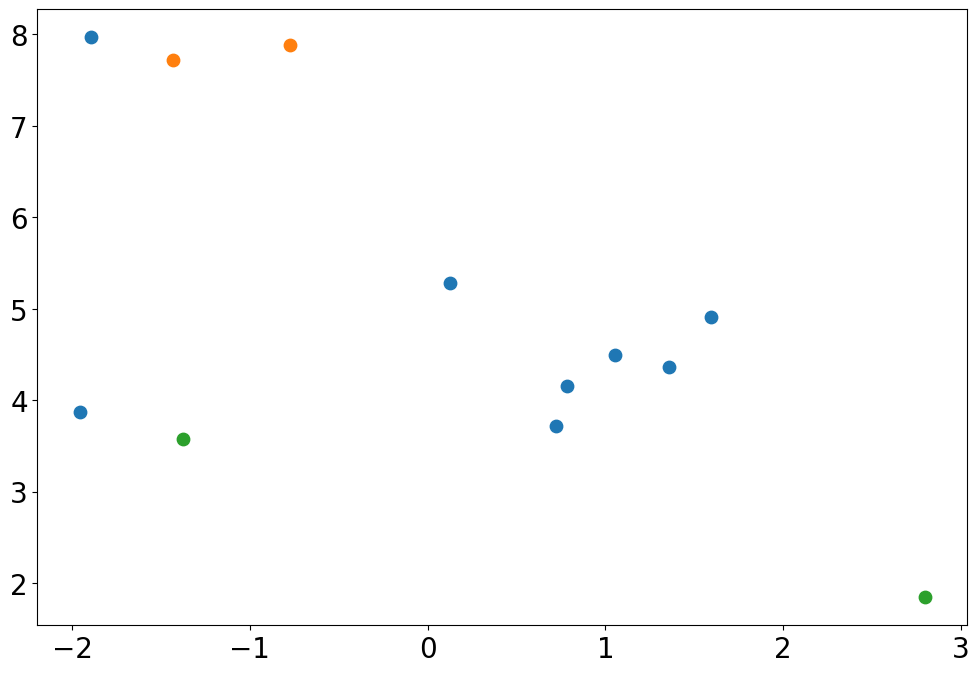

In [42]:
# Data Distribution Vistualisation
plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.scatter(X_test[X_test[:,2]==0,0], X_test[X_test[:,2]==0,1], s=80)
plt.scatter(X_test[X_test[:,2]==1,0], X_test[X_test[:,2]==1,1], s=80)
plt.scatter(myu[:,0],myu[:,1],s=80)
plt.show()

### Problem 5: Repeat

In [43]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split
X_train, X_valid =  \
train_test_split(X,train_size=0.8,random_state=None)

print(X_train.shape)
print(X_valid.shape)

(80, 2)
(20, 2)


### Problem 6: Calculate with different initial values

In [44]:
clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)
clf.fit(X_train)

### Problem 7: Estimate

In [45]:
# Scartch clustering to estimate validatin data
pred = clf.predict(X_valid)
print(pred)

[3. 2. 2. 3. 2. 2. 1. 1. 3. 2. 2. 2. 2. 0. 0. 1. 3. 0. 3. 0.]


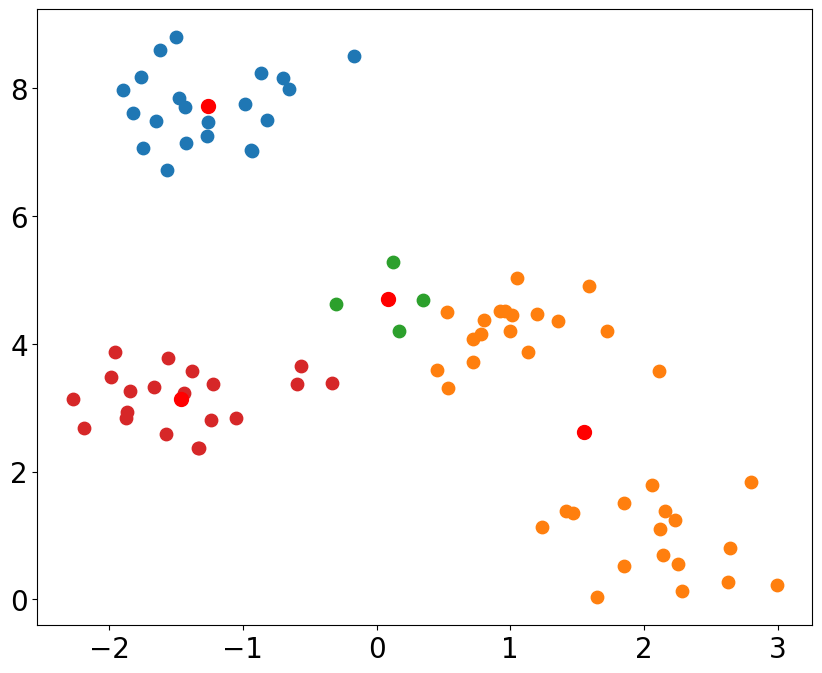

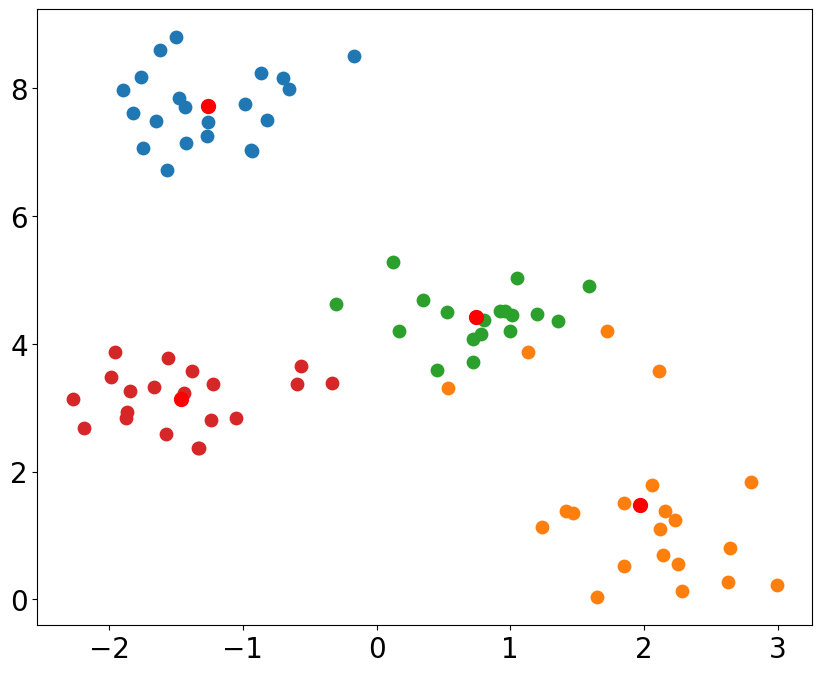

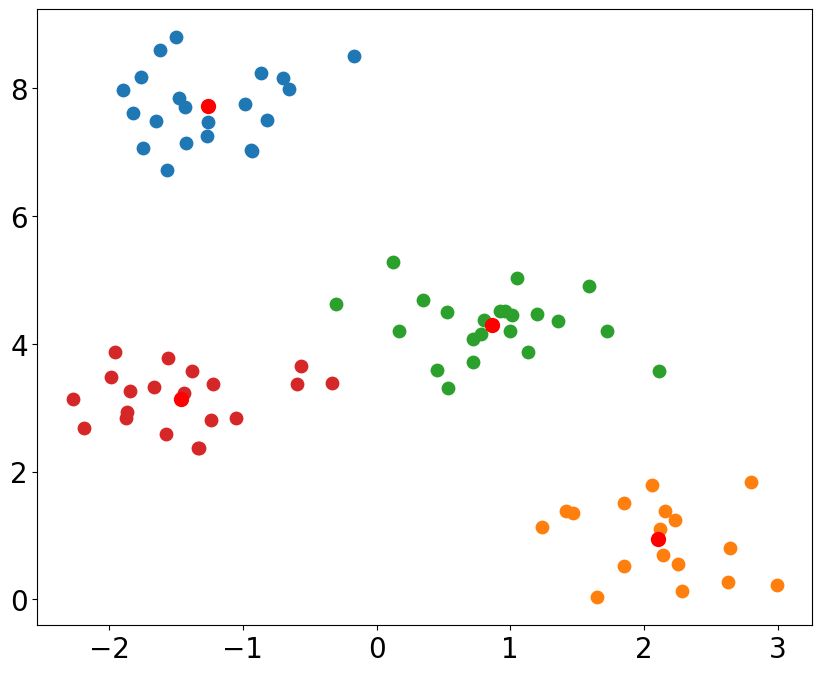

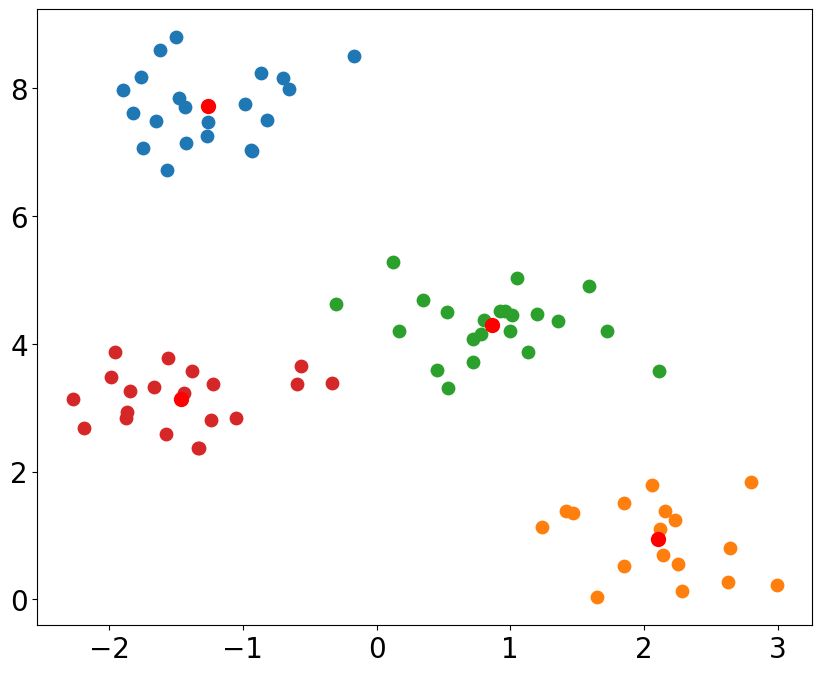

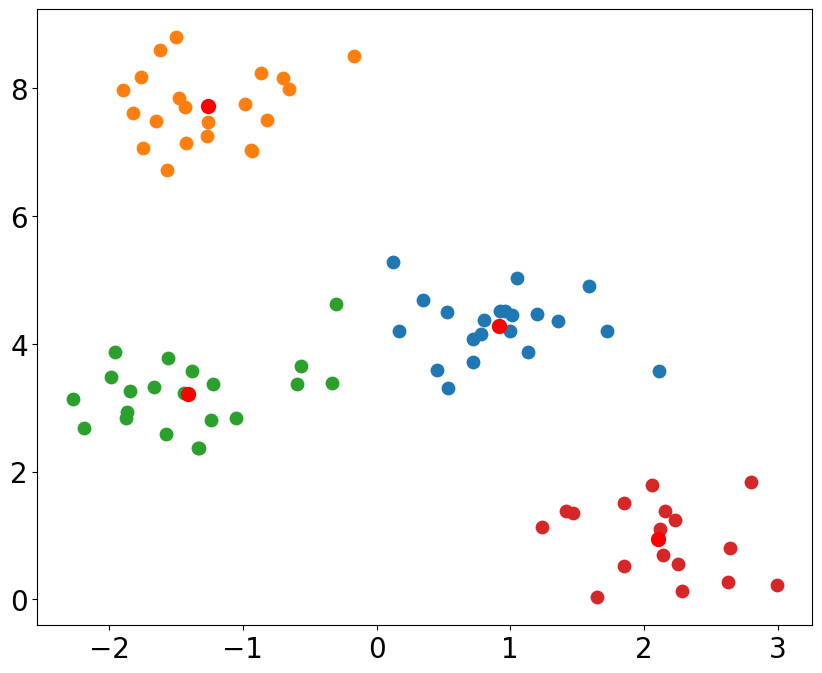

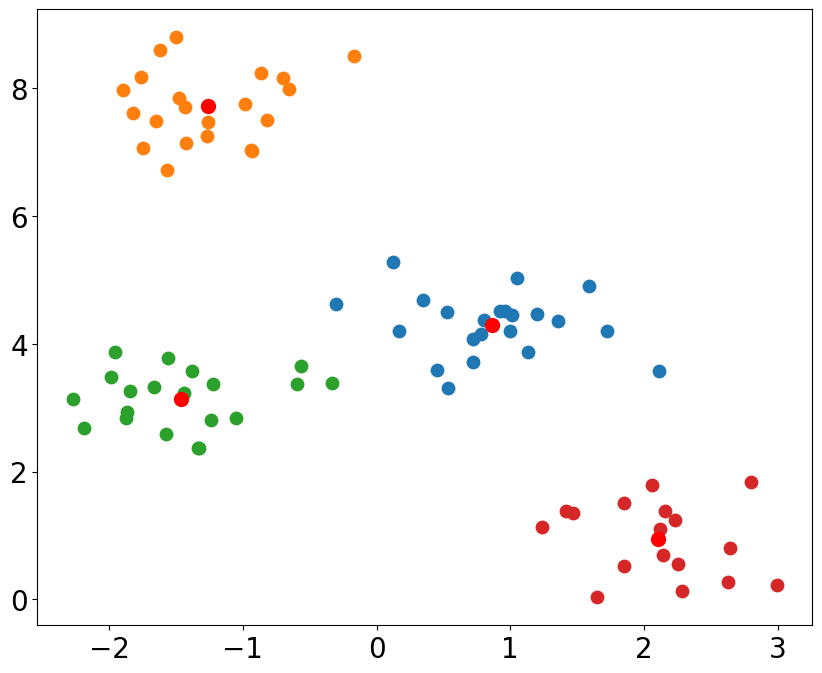

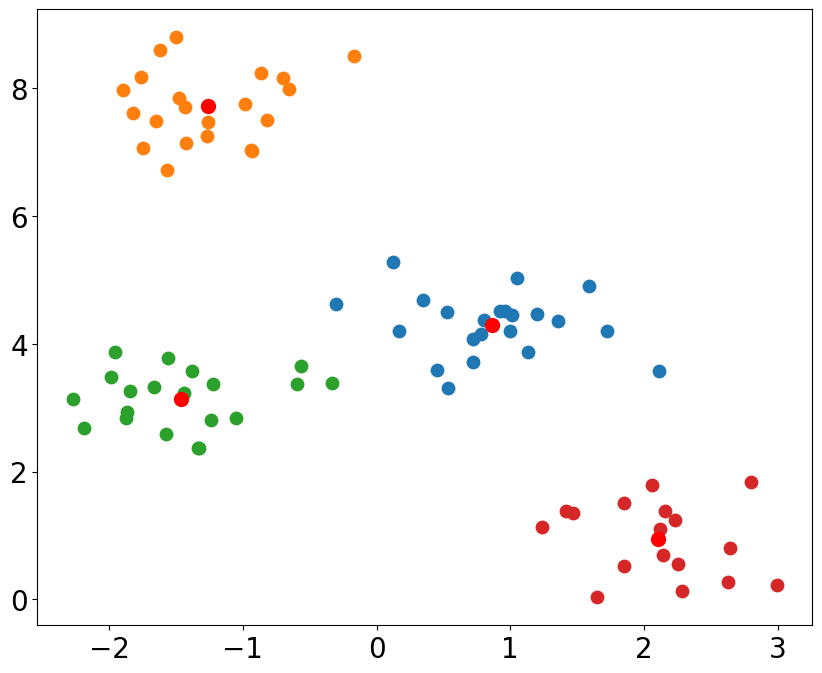

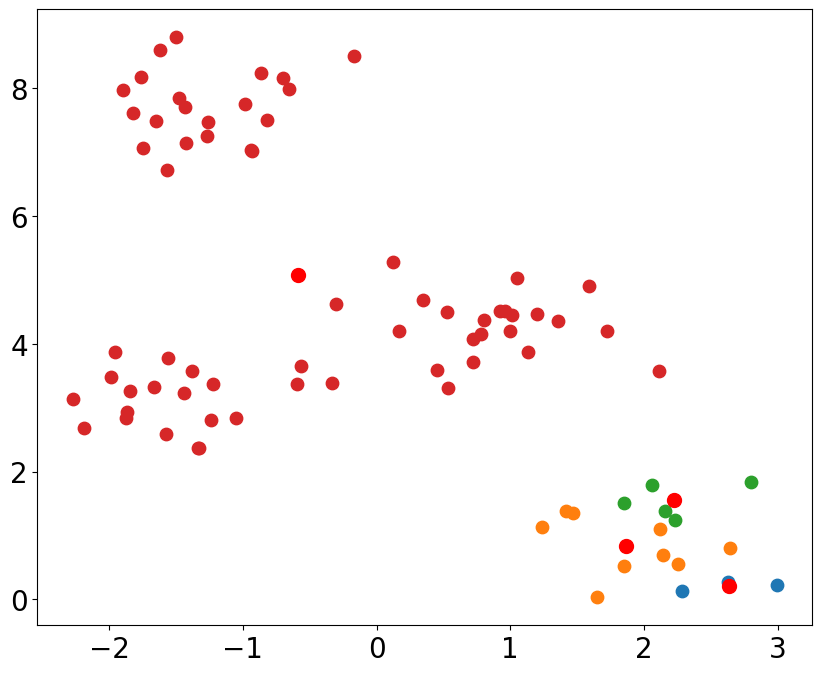

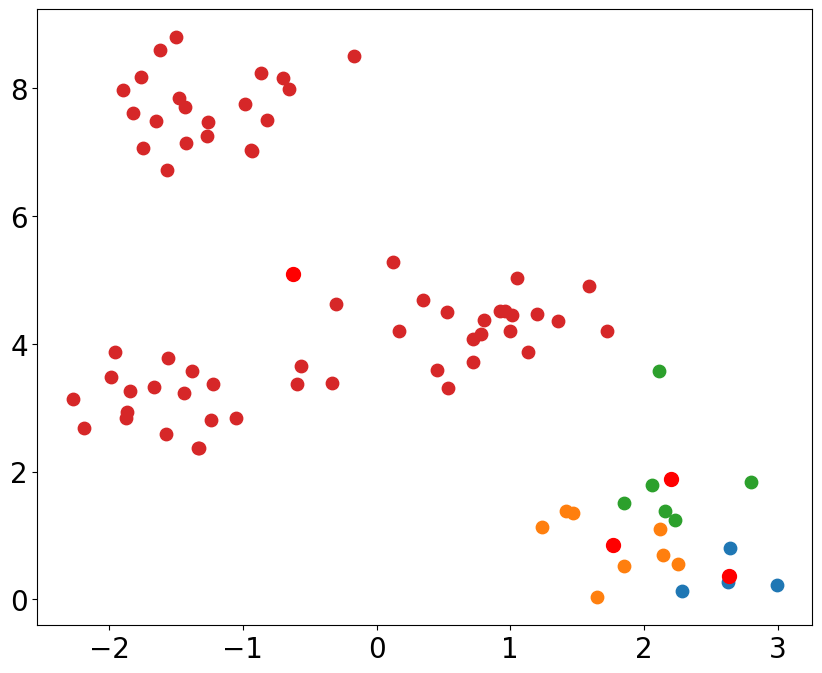

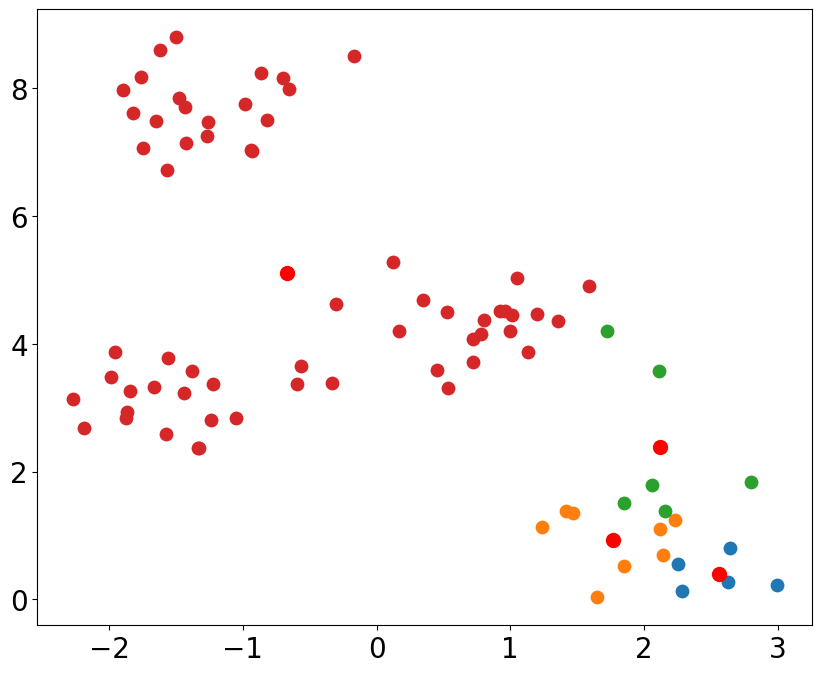

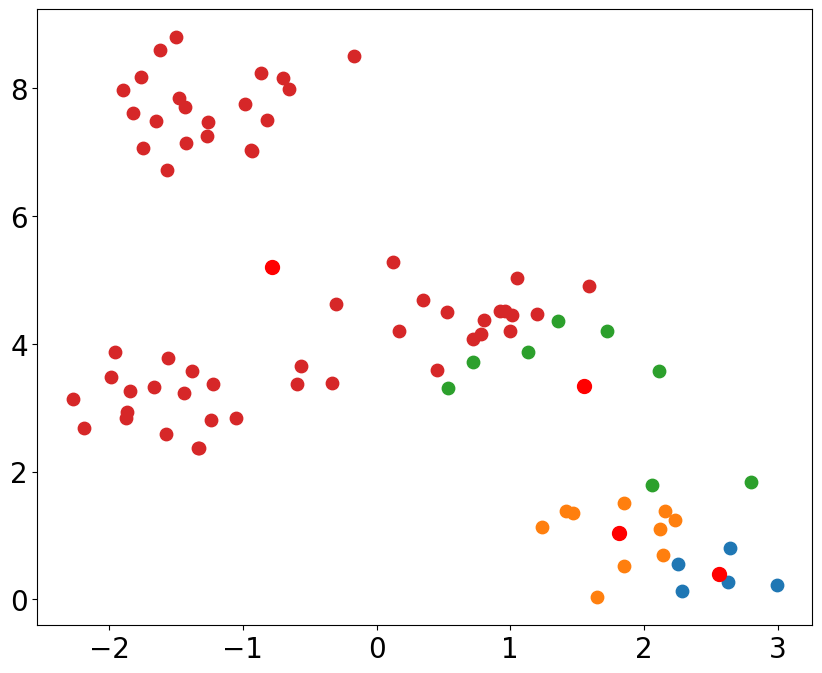

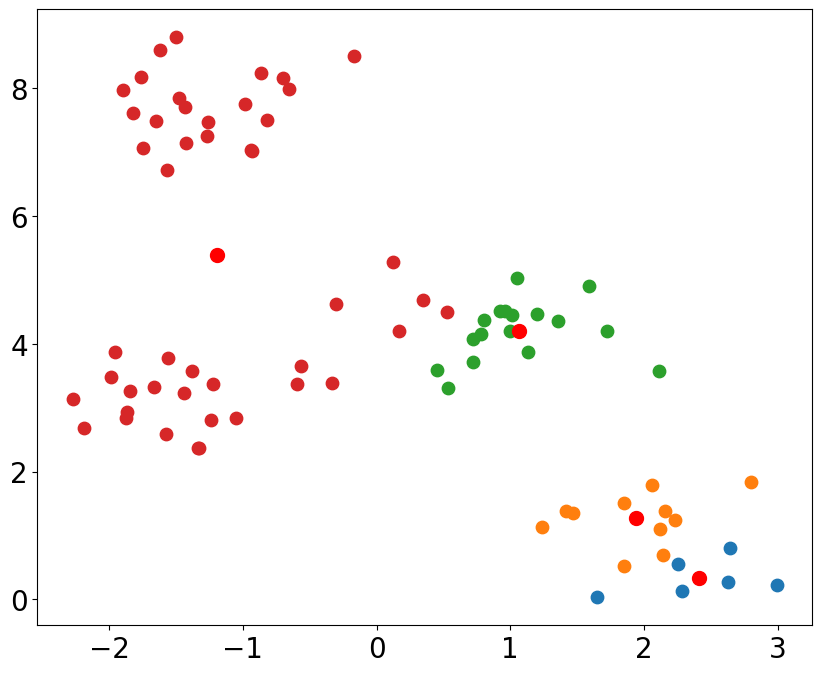

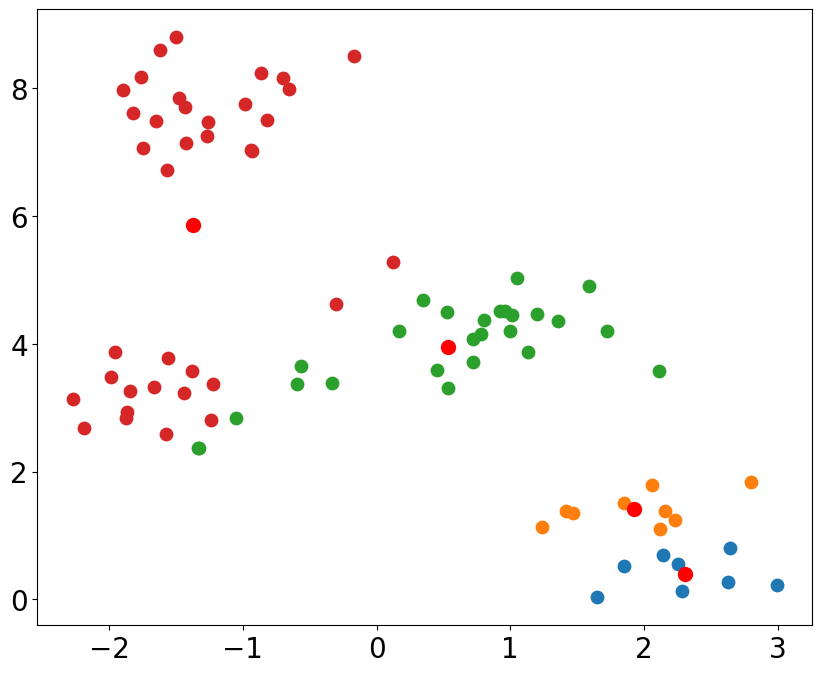

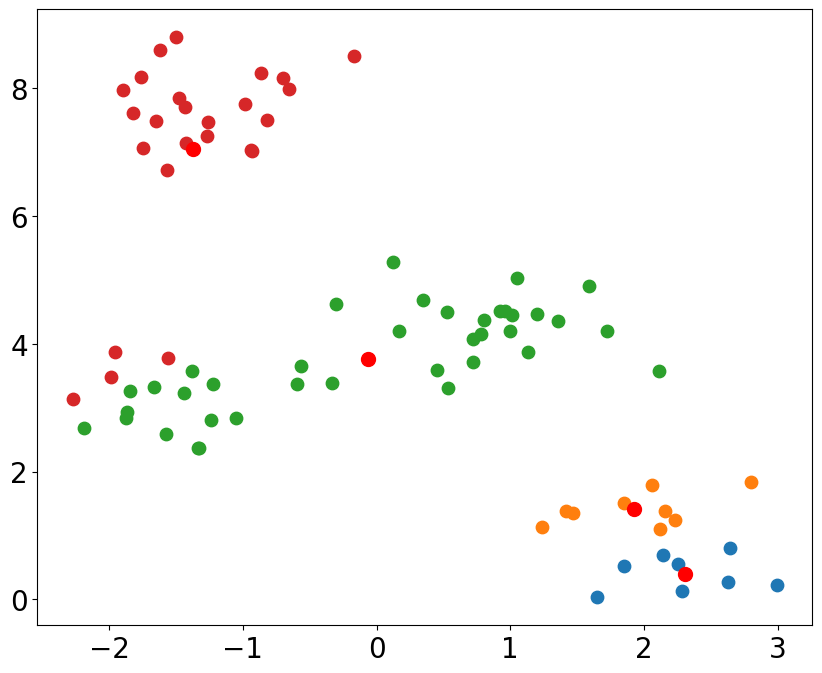

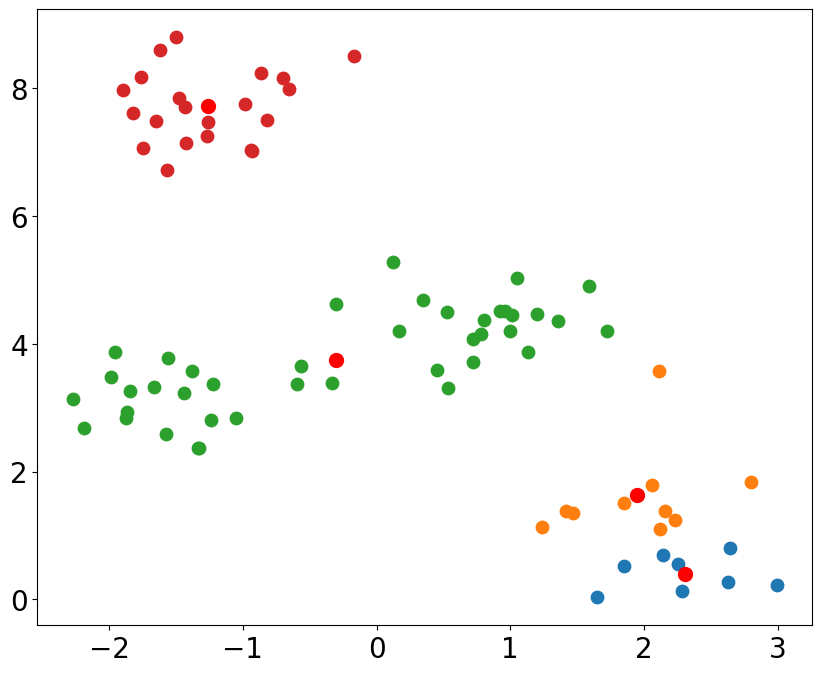

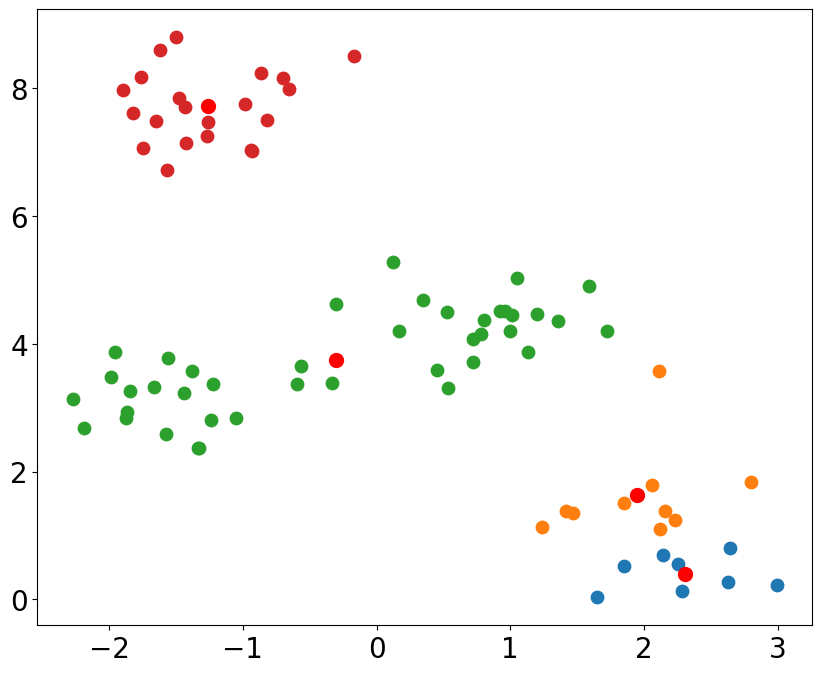

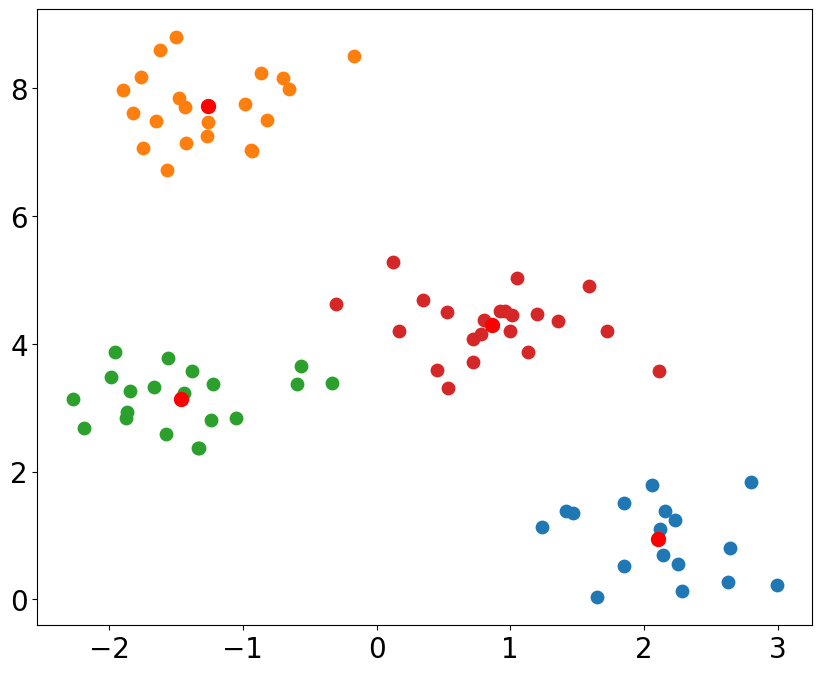

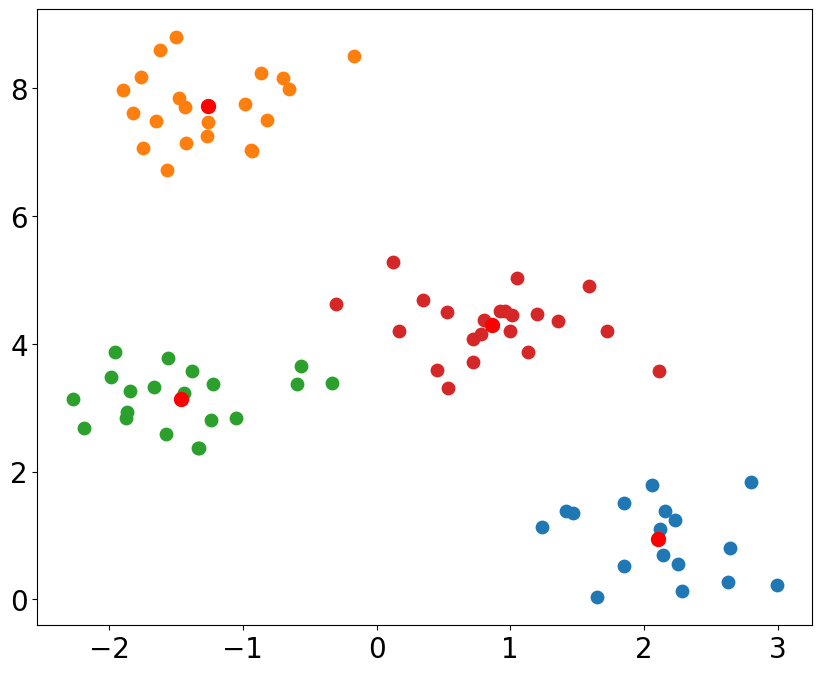

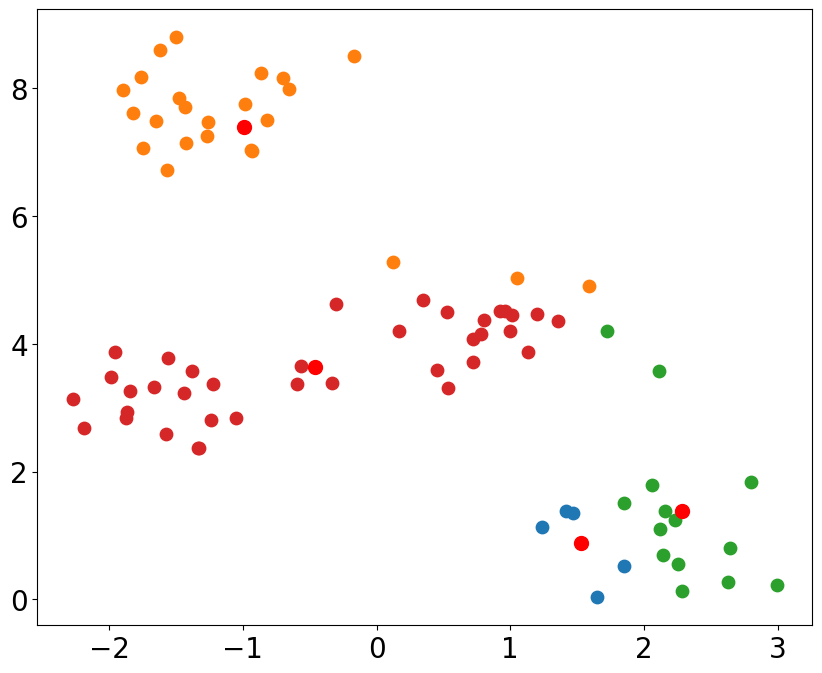

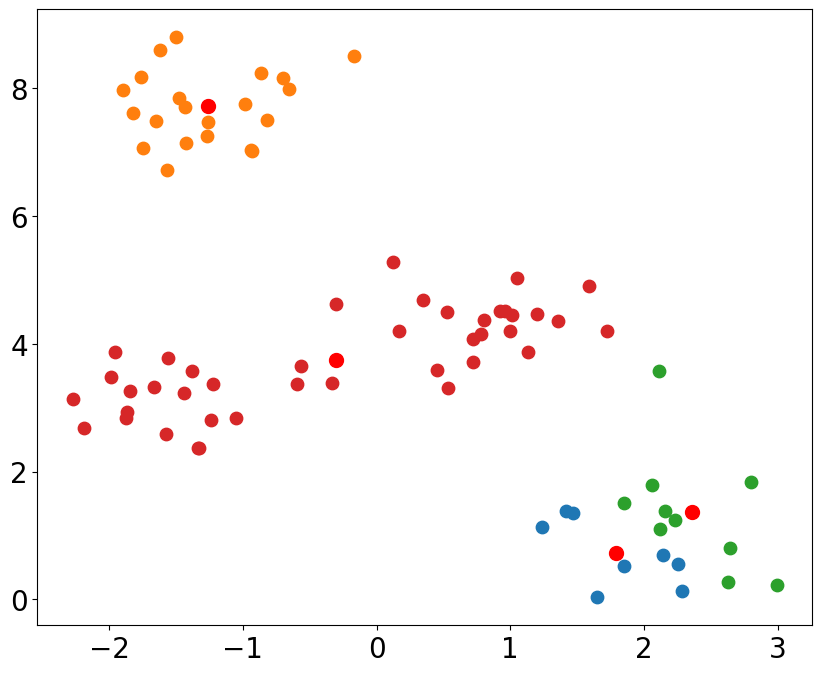

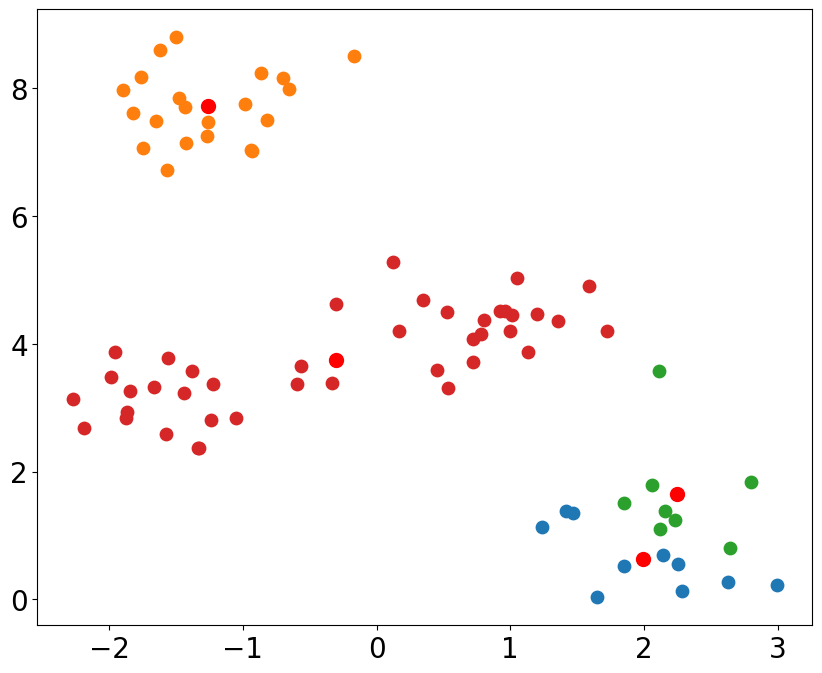

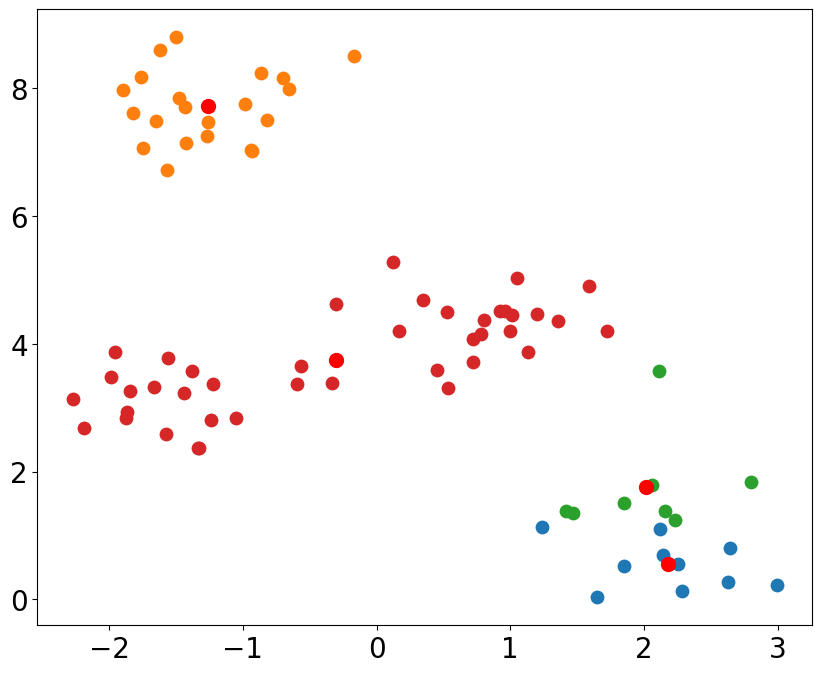

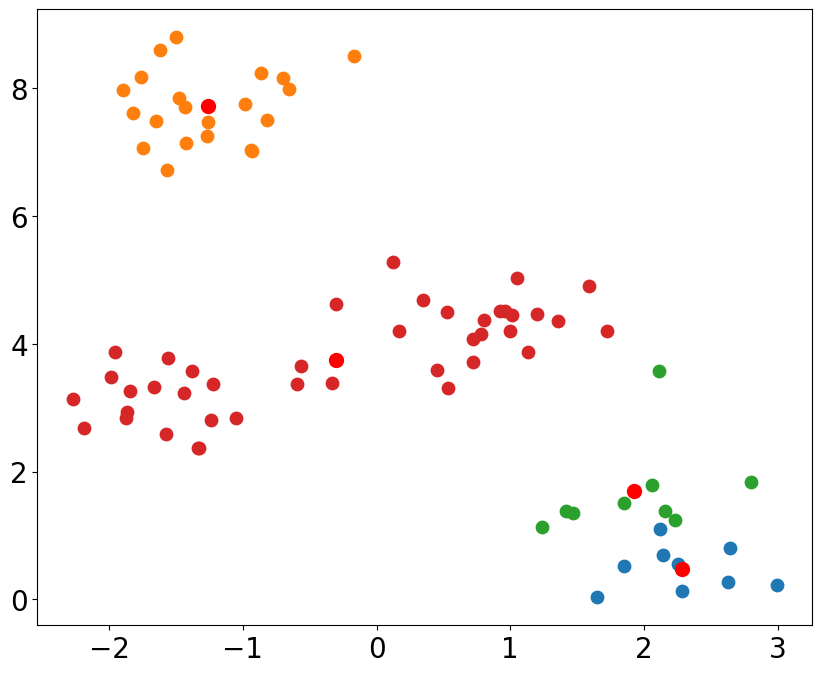

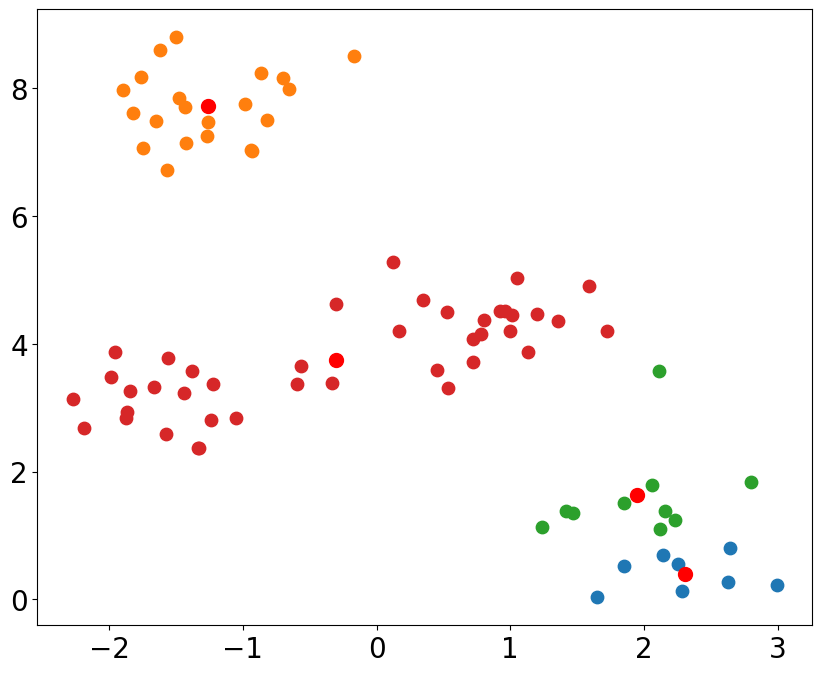

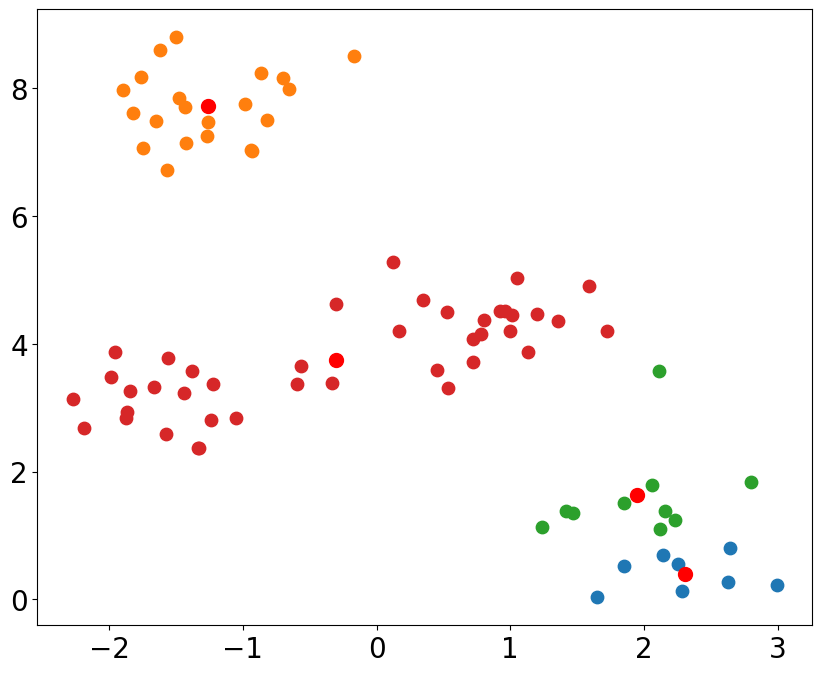

In [46]:
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=5,max_iter=1000,tol=1e-5,verbose=True)
clf2.fit(X_train)

In [47]:
# Estimate validation data with scratch clustering2
pred = clf2.predict(X_valid)
print(pred)

[3 1 1 3 1 1 2 2 3 1 1 1 1 0 0 2 3 0 3 0]


In [48]:
%%timeit
clf = clf = ScratchKMeans(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

833 ns ± 204 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [49]:
%%timeit
clf2 = ScratchKMeans_speed(n_clusters=4,n_init=50,max_iter=500,tol=1e-5,verbose=False)

995 ns ± 296 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Problem 8: Implementation of the elbow method

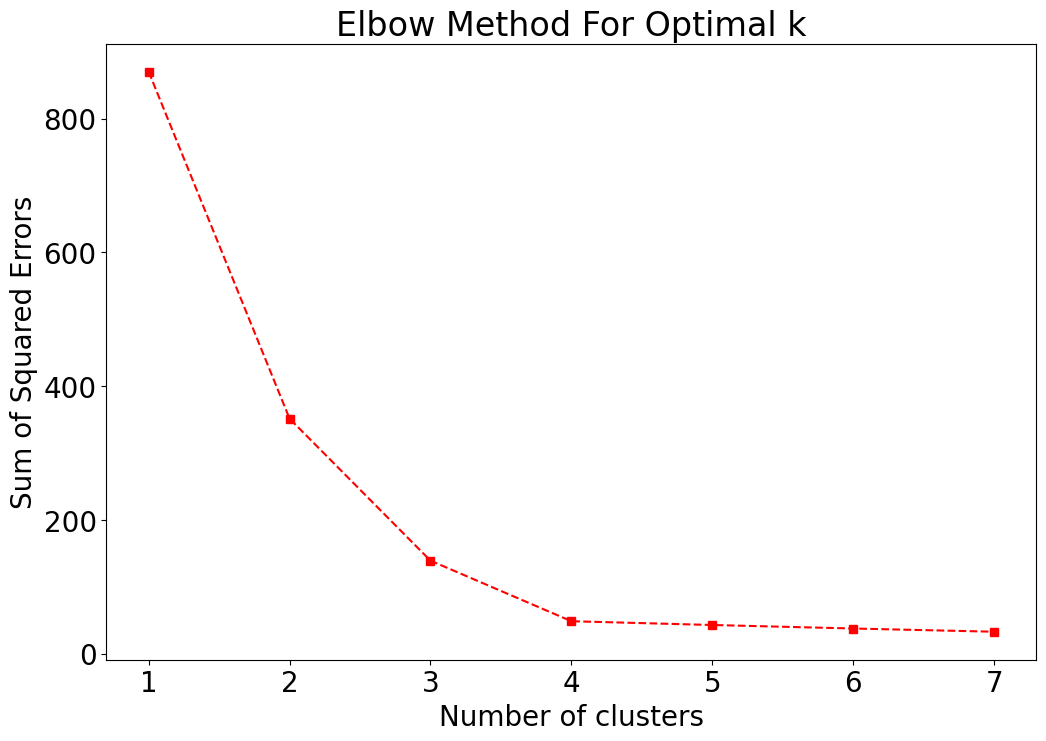

In [50]:
# Model evaluation with elbow method (visualization)
elbow = {}
for k in range(1, 8):
    model = ScratchKMeans_speed(n_clusters=k, n_init=100, max_iter=1000, tol=1e-5, verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse

plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()), list(elbow.values()), 'rs--')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method For Optimal k')
plt.show()


### Problem 9: Silhouette diagram

In [51]:
# Sort, get index
print(myu)
print(myu[1].argsort()[1])

[[-1.37778493  3.58107521]
 [ 2.79939362  1.84560825]]
0


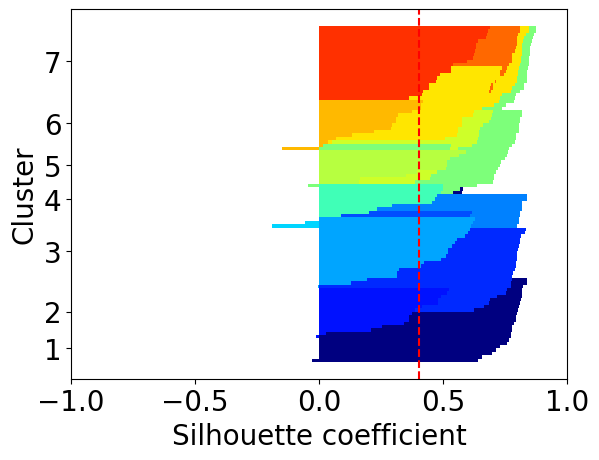

In [52]:
# Visualize a silhouette diagram
from matplotlib import cm

plt.rcParams["font.size"] = 20

for k in range(2,8):
  model = ScratchKMeans_speed(n_clusters=k, n_init=100, max_iter=1000, tol=1e-5, verbose=False)
  model.fit(X)

  y_ax_lower, y_ax_upper = 0, 0
  yticks = []

  for i, c in enumerate(model.cluster_labels):
      c_silhouette_vals = model.silhouette_vals[model.y_kn == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(i /model.n_clusters)
      plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
      yticks.append((y_ax_lower + y_ax_upper) / 2)
      y_ax_lower += len(c_silhouette_vals)

plt.axvline(model.silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, model.cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.xlim(-1,1)
plt.show()

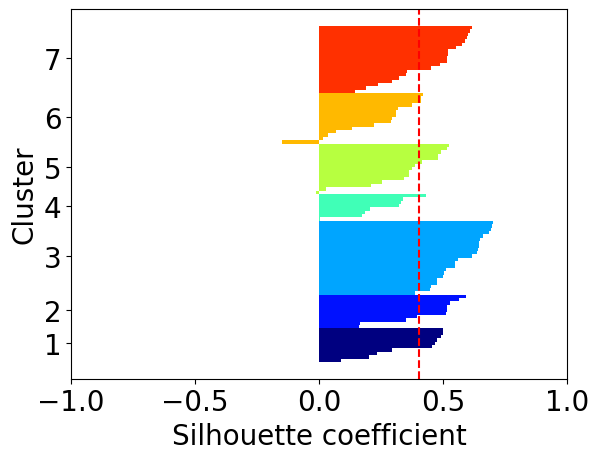

In [32]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(model.cluster_labels):
    c_silhouette_vals =model.silhouette_vals[model.y_kn == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / model.n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(model.silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, model.cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.xlim(-1,1)
plt.show()

In [2]:
# Cluster Analysis Library import
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
import warnings


In [3]:
warnings.simplefilter('ignore')

In [5]:
data = pd.DataFrame(pd.read_csv('wholesale+customers.zip'))

In [6]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
# describe
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

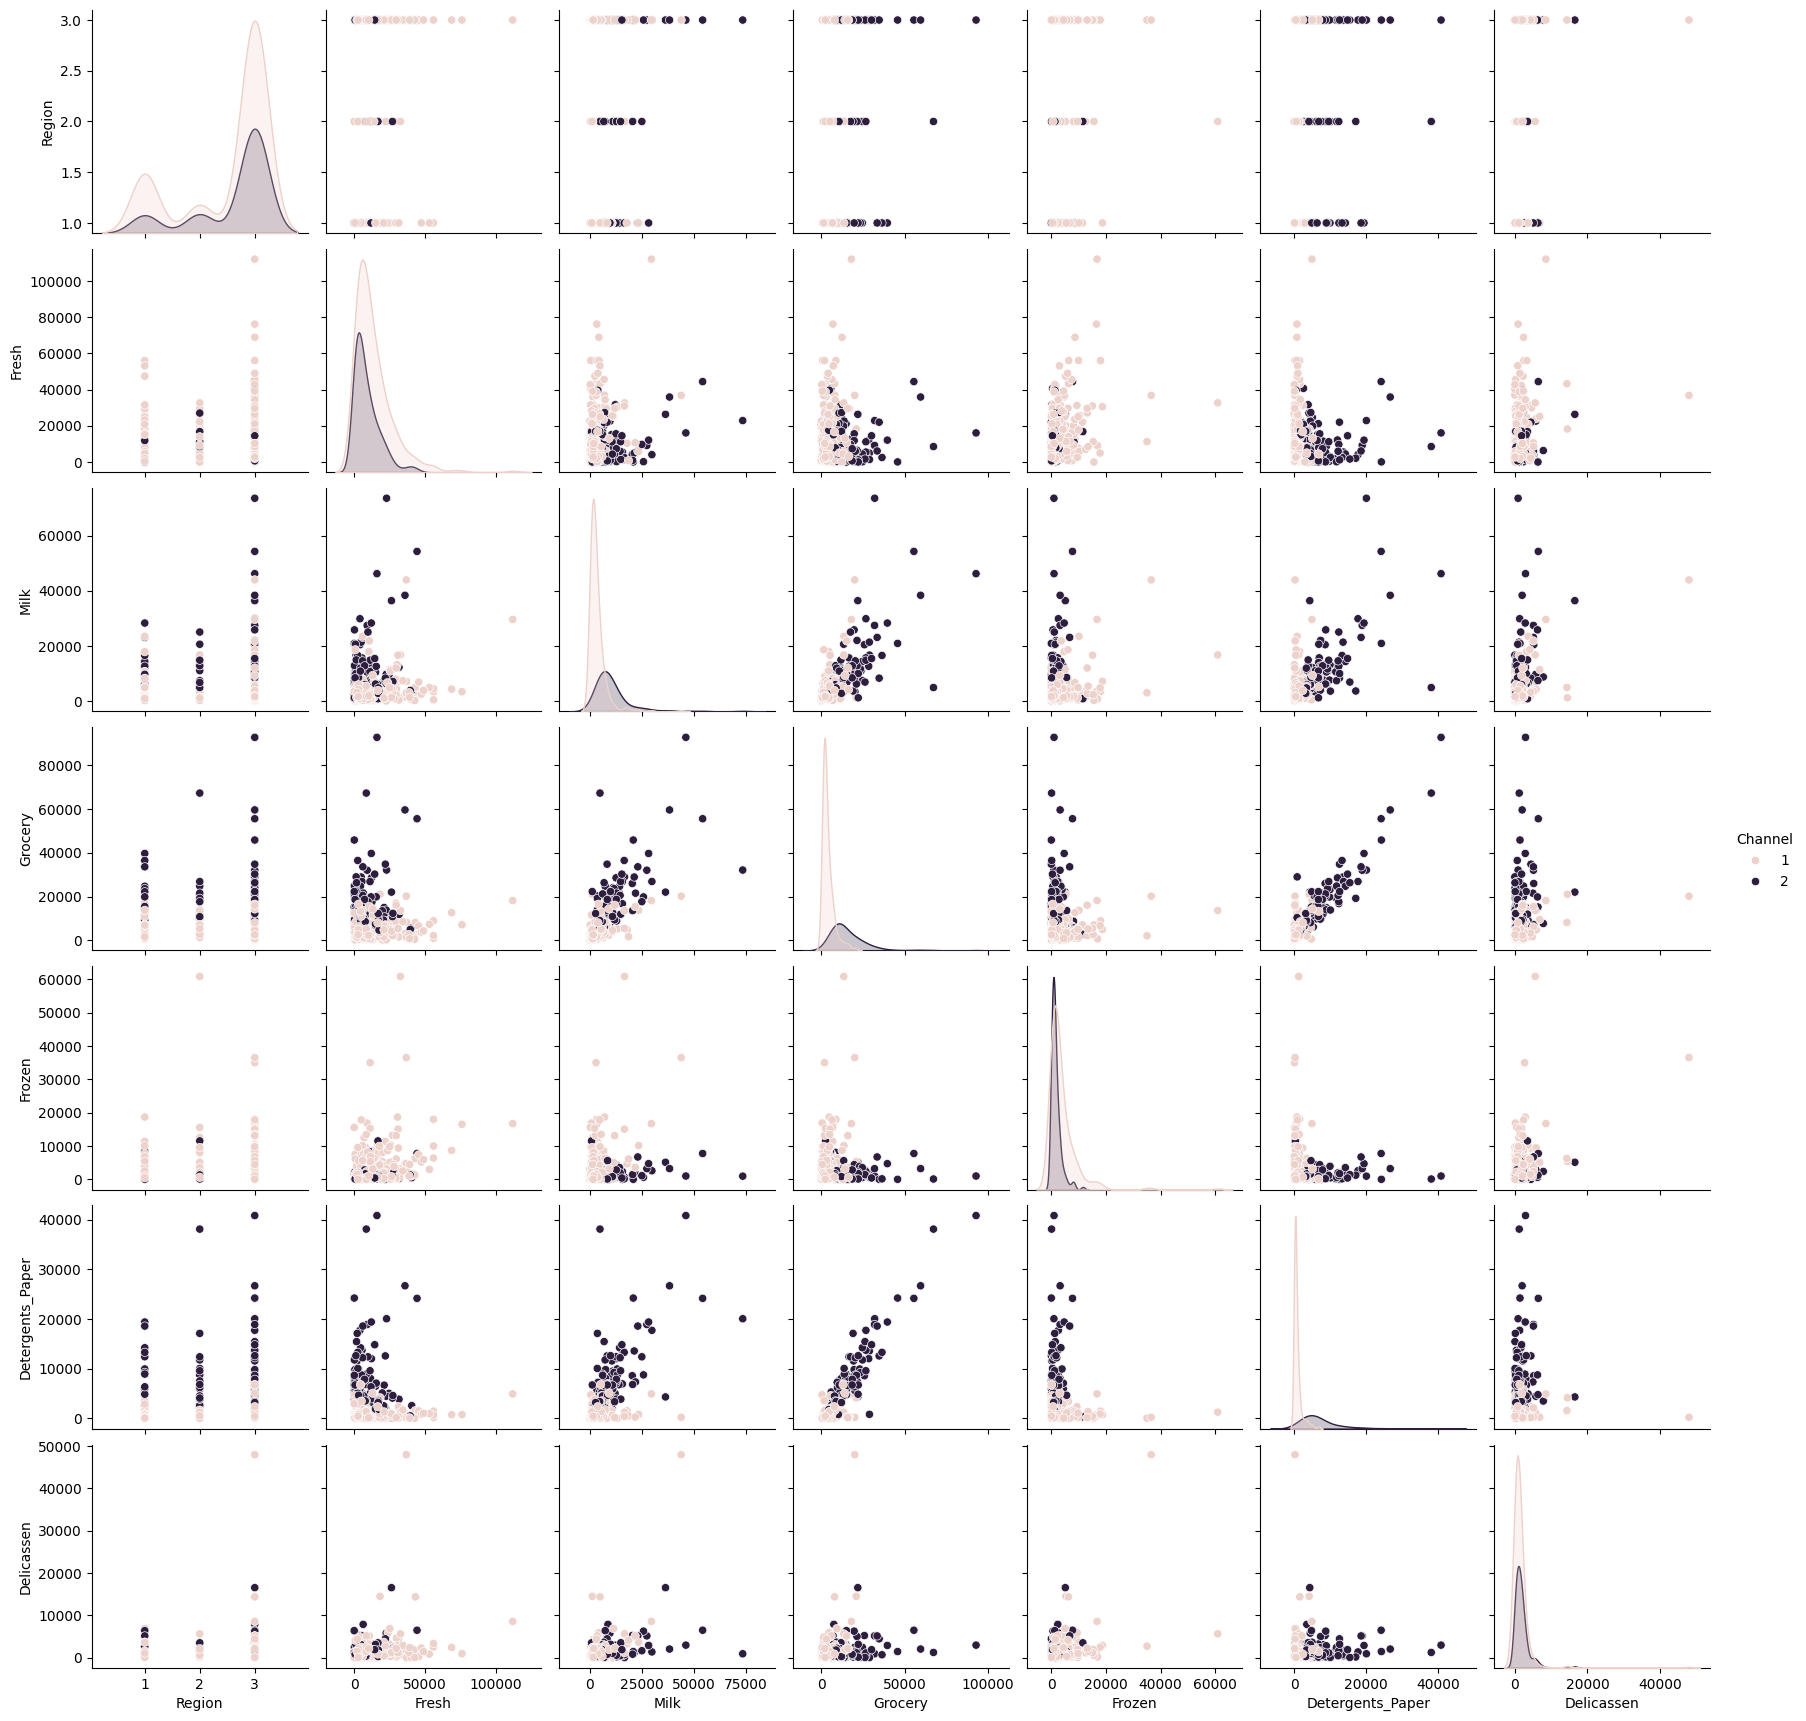

In [9]:
#pairplot
sns.pairplot(data,hue='Channel');

In [10]:
data.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [11]:
data.groupby(['Region']).mean()

Channel         Fresh         Milk      Grocery       Frozen  \
Region                                                                  
1       1.233766  11101.727273  5486.415584  7403.077922  3000.337662   
2       1.404255   9887.680851  5088.170213  9218.595745  4045.361702   
3       1.332278  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper   Delicassen  
Region                                 
1            2651.116883  1354.896104  
2            3687.468085  1159.702128  
3            2817.753165  1620.601266

In [12]:
data.groupby(['Channel']).mean()

Region         Fresh          Milk       Grocery       Frozen  \
Channel                                                                    
1        2.510067  13475.560403   3451.724832   3962.137584  3748.251678   
2        2.612676   8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper   Delicassen  
Channel                                 
1              790.560403  1415.956376  
2             7269.507042  1753.436620

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

Cumulative explained variance ratio: [0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


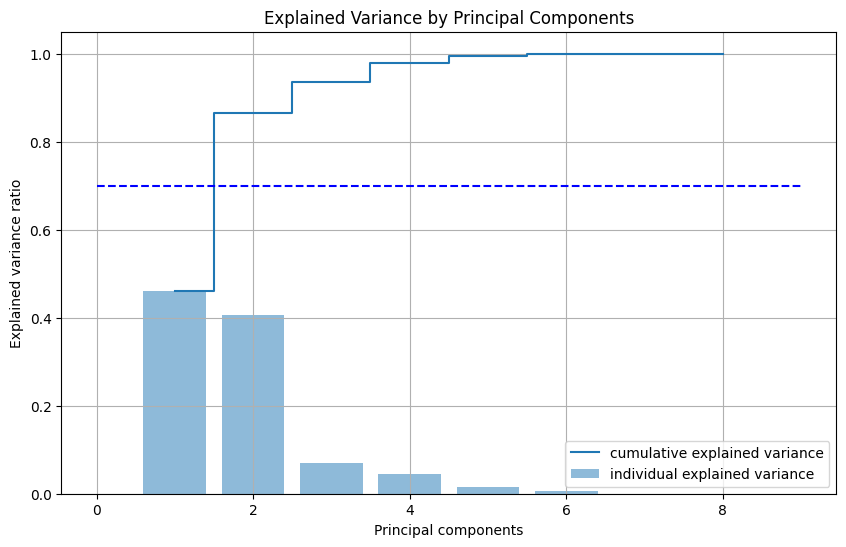

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming data is already loaded
data = pd.read_csv('wholesale+customers.zip')

# PCA
pca = PCA(n_components=None)
pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance ratio:", cum_var_exp)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.hlines(0.7, 0, len(var_exp)+1, "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()


### Problem 10: Selection of the number of clusters

In [16]:
# Delete Channel and Region
data_c = data.iloc[:,2:7]
data_c

Fresh   Milk  Grocery  Frozen  Detergents_Paper
0    12669   9656     7561     214              2674
1     7057   9810     9568    1762              3293
2     6353   8808     7684    2405              3516
3    13265   1196     4221    6404               507
4    22615   5410     7198    3915              1777
..     ...    ...      ...     ...               ...
435  29703  12051    16027   13135               182
436  39228   1431      764    4510                93
437  14531  15488    30243     437             14841
438  10290   1981     2232    1038               168
439   2787   1698     2510      65               477

[440 rows x 5 columns]

In [17]:
# logarithmic transformation
data_log = data_c.apply(np.log)

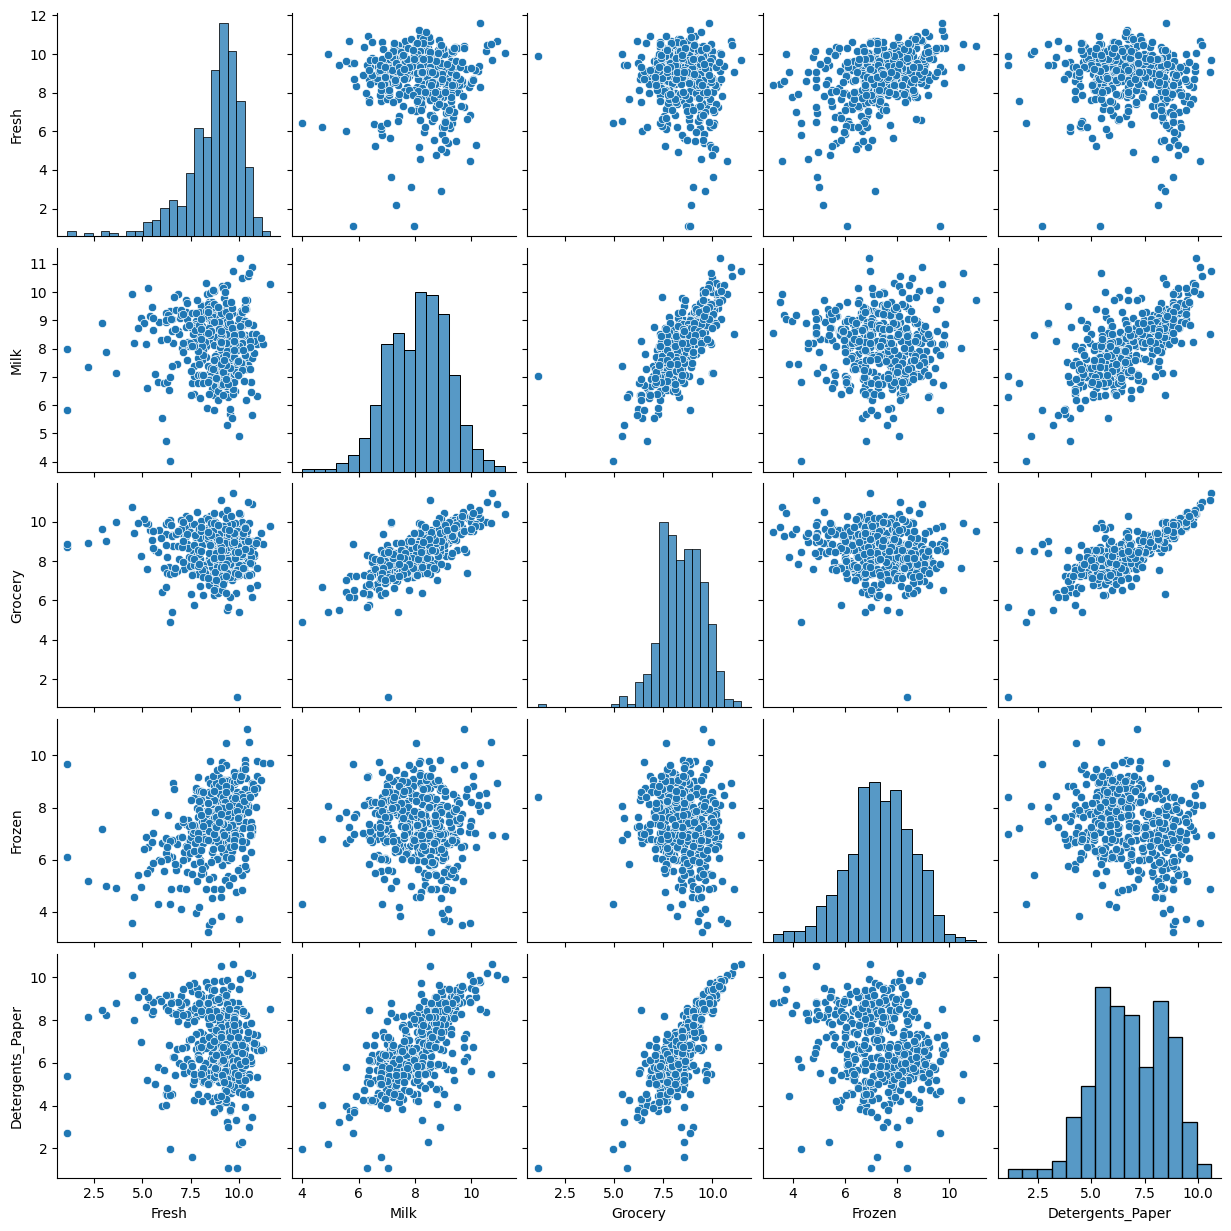

In [18]:
#pairplot
sns.pairplot(data_log);

Cumulative explained variance ratio: [0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


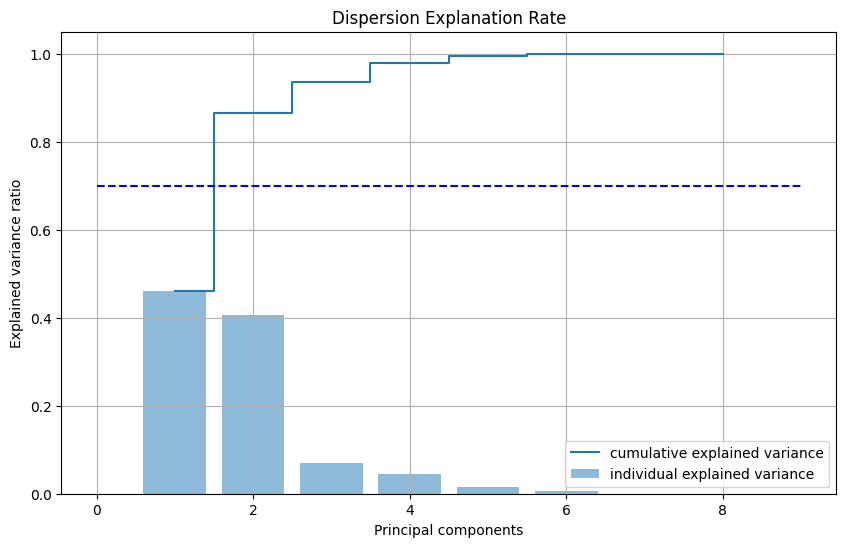

In [19]:
#dispersion explanation rate
n = 4

# PCA
pca = PCA(n_components=None)
pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance ratio:", cum_var_exp)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Dispersion Explanation Rate')
plt.hlines(0.7, 0, len(var_exp)+1, "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()


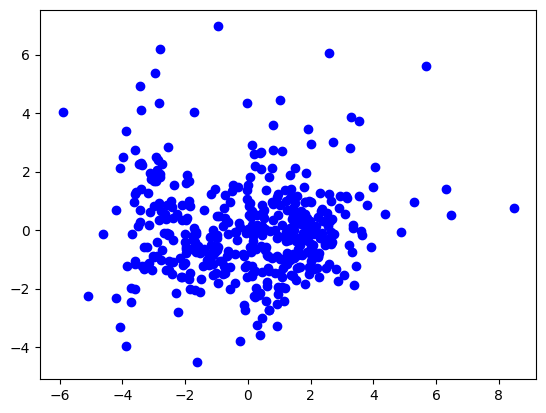

In [20]:
#PCA analysis(dimension reduction for visualization)
pca = PCA(n_components=2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)
plt.plot(data_pca[:,0],data_pca[:,1],'bo')

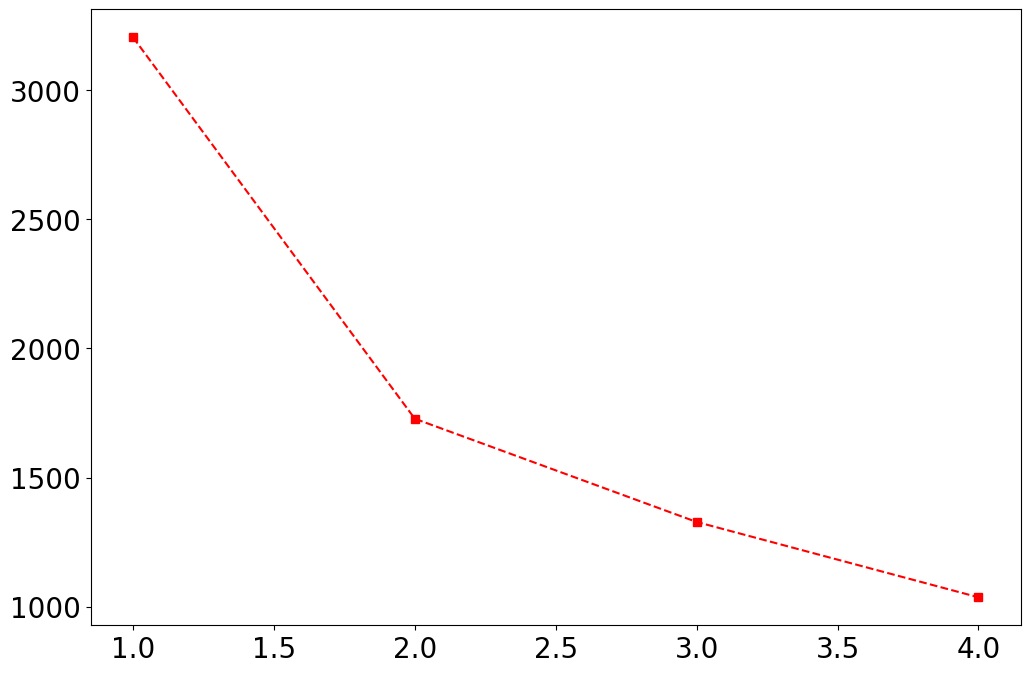

In [53]:
# Clustering with scratch K-means

# model evaluation with elbow method (visualization)
elbow={}
for k in range(1,5):
  model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000, tol= 1e-5,verbose=False)
  model.fit(data_pca)
  elbow[k] = model.best_sse


plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');
plt.show()

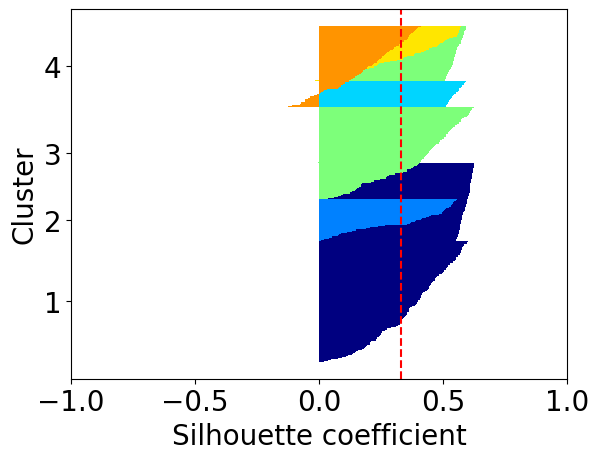

In [54]:
# Visualization of silhouette diagram
from matplotlib import cm

plt.rcParams["font.size"] = 20

for k in range(2,5):
  model = ScratchKMeans_speed(n_clusters=k, n_init=100, max_iter=1000, tol=1e-5)
  model.fit(data_pca)

  y_ax_lower, y_ax_upper = 0, 0
  yticks = []

  for i, c in enumerate(model.cluster_labels):
      c_silhouette_vals = model.silhouette_vals[model.y_kn == c]
      c_silhouette_vals.sort()
      y_ax_upper += len(c_silhouette_vals)
      color = cm.jet(i /model.n_clusters)
      plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
      yticks.append((y_ax_lower + y_ax_upper) / 2)
      y_ax_lower += len(c_silhouette_vals)

plt.axvline(model.silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, model.cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.xlim(-1,1)
plt.show()

In [55]:
# k=3 Clustering

model = ScratchKMeans_speed(n_clusters=k,n_init=100,max_iter=1000,tol=1e-5)
model.fit(data_pca)

In [56]:
# Label value after Clustering
cluster = model.y_kn

# Join to data
data['cluster'] = cluster

In [57]:
data

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  cluster  
0          1338        3  
1          1776        3  
2          7844        3  
3          1788        2  
4          5185        2  
..          ...      ...  
435        2204        2  
436        2346        2  
437        1867        3  
438        2125        0  
439          52        0  

[440 rows x 9 columns]

In [58]:
data_pca_label_ = np.concatenate([data_pca, cluster.reshape(-1, 1)], axis=1)

data_pca_label_


array([[-1.69620453, -0.06848561,  3.        ],
       [-1.65631997, -0.75888277,  3.        ],
       [-1.52373431, -0.7937697 ,  3.        ],
       ...,
       [-3.60878778, -1.14616144,  3.        ],
       [ 1.81316066,  0.29083241,  0.        ],
       [ 0.18426764,  2.58787592,  0.        ]])

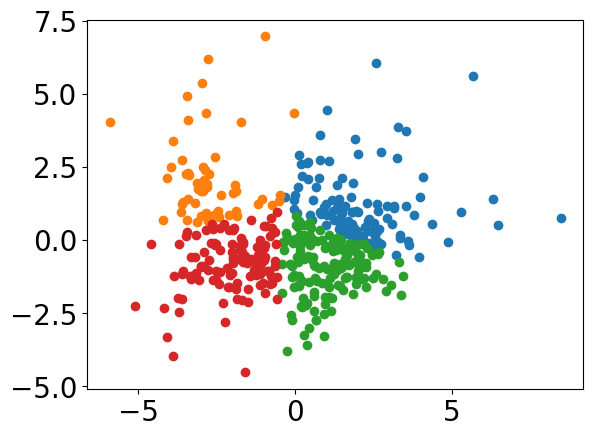

In [59]:
# Visualization

for i in range(model.n_clusters):
    plt.scatter(data_pca_label_[cluster ==i,0],data_pca_label_[cluster==i,1]);

### Problem 11: Comparison with known groups

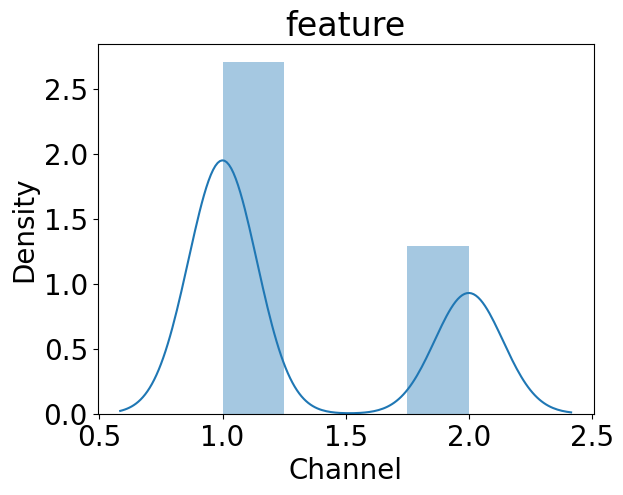

In [60]:
feature = 'Channel'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title('feature')
plt.show()

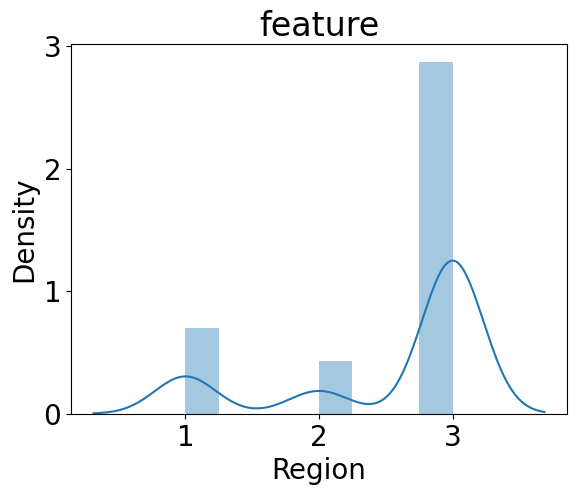

In [61]:
feature = 'Region'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title('feature')
plt.show()

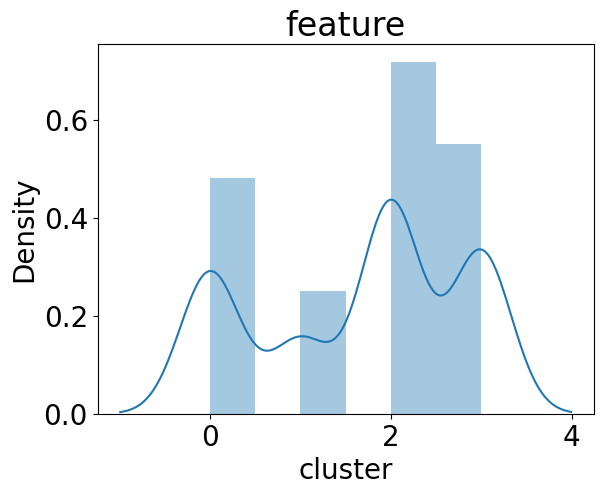

In [62]:
feature = 'cluster'

fig = plt.figure()
ax = fig.add_subplot()
ax = sns.distplot(data[feature])

plt.title('feature')
plt.show()

### Problem 12: Useful information for wholesalers

In [63]:
data.groupby(['Channel','Region','cluster']).agg(['mean','max','min'])

Fresh                         Milk         \
                                mean     max    min          mean    max   
Channel Region cluster                                                     
1       1      0         6607.000000   18692    514   1886.000000   8323   
               1         5396.000000    5396   5396   7503.000000   7503   
               2        20571.500000   56083   5041   3249.321429  11487   
               3         4769.500000   11210   1537   9213.800000  23527   
        2      0         4407.625000   13970      3   1415.375000   3696   
               1         1182.000000    1182   1182   3088.000000   3088   
               2        15251.157895   32717   2617   2637.263158  16784   
        3      0         7438.705128   42786    190   1844.756410   9250   
               1         1584.571429    6137      3   4380.500000   8847   
               2        19784.737864   76237    759   4102.980583  43950   
               3        18002.375000  112151   2438   6745.500000  29627   
2       1      1         1394.000000    3062     18  10235.000000  16599   
               2         6931.000000   11072   2790   4258.000000   5989   
               3         7137.400000   20782   2362  12418.600000  28326   
        2      1         1381.000000    2886    161  10837.666667  20655   
               2        16823.000000   16823  16823    928.000000    928   
               3         9449.750000   27082   2137   9055.916667  25071   
        3      1         1473.629630    8590     23   8946.222222  25862   
               2        22580.800000   39679  13146   3899.200000   5410   
               3        12049.534247   44466   1210  12218.657534  73498   

                                   Grocery                      Frozen         \
                         min          mean    max    min          mean    max   
Channel Region cluster                                                          
1       1      0         258   1869.650000   6869    489   1980.250000   6818   
               1        7503  10646.000000  10646  10646     91.000000     91   
               2         489   4055.250000  16966   1393   4167.428571  18711   
               3        1115   7595.600000  15538   2824   2812.800000  10155   
        2      0         333   2624.250000   7021   1330   3004.500000  15601   
               1        3088   6114.000000   6114   6114    978.000000    978   
               2         713   5050.842105  13626   1447   7149.842105  60869   
        3      0          55   2147.423077  16483      3   1571.500000   7530   
               1         918   7221.428571  13227   3268    294.428571    868   
               2         542   3812.000000  20170    683   5790.951456  36534   
               3        1266   9929.125000  21042   5005   3027.437500  16745   
2       1      1        6154  21138.333333  36486  13916    821.833333   2221   
               2        2527   5440.000000   5615   5265   6966.500000   8321   
               3        4737  19478.500000  39694   6089   2765.000000   6746   
        2      1        3688  13788.333333  24773   8852    733.166667   1465   
               2         928   2743.000000   2743   2743  11559.000000  11559   
               3        1897  18727.250000  67298   5234   1109.416667   1840   
        3      1        1275  16099.000000  45828   6981    394.185185   1116   
               2        1124   6009.200000   8713   4523   3178.000000   8132   
               3        2884  16581.246575  92780   4602   1813.054795   7782   

                              Detergents_Paper                Delicassen  \
                          min             mean    max   min         mean   
Channel Region cluster                                                     
1       1      0          469       436.600000   4762     5   606.350000   
               1           91      4167.000000   4167  4167   239.000000   
               2          327       61

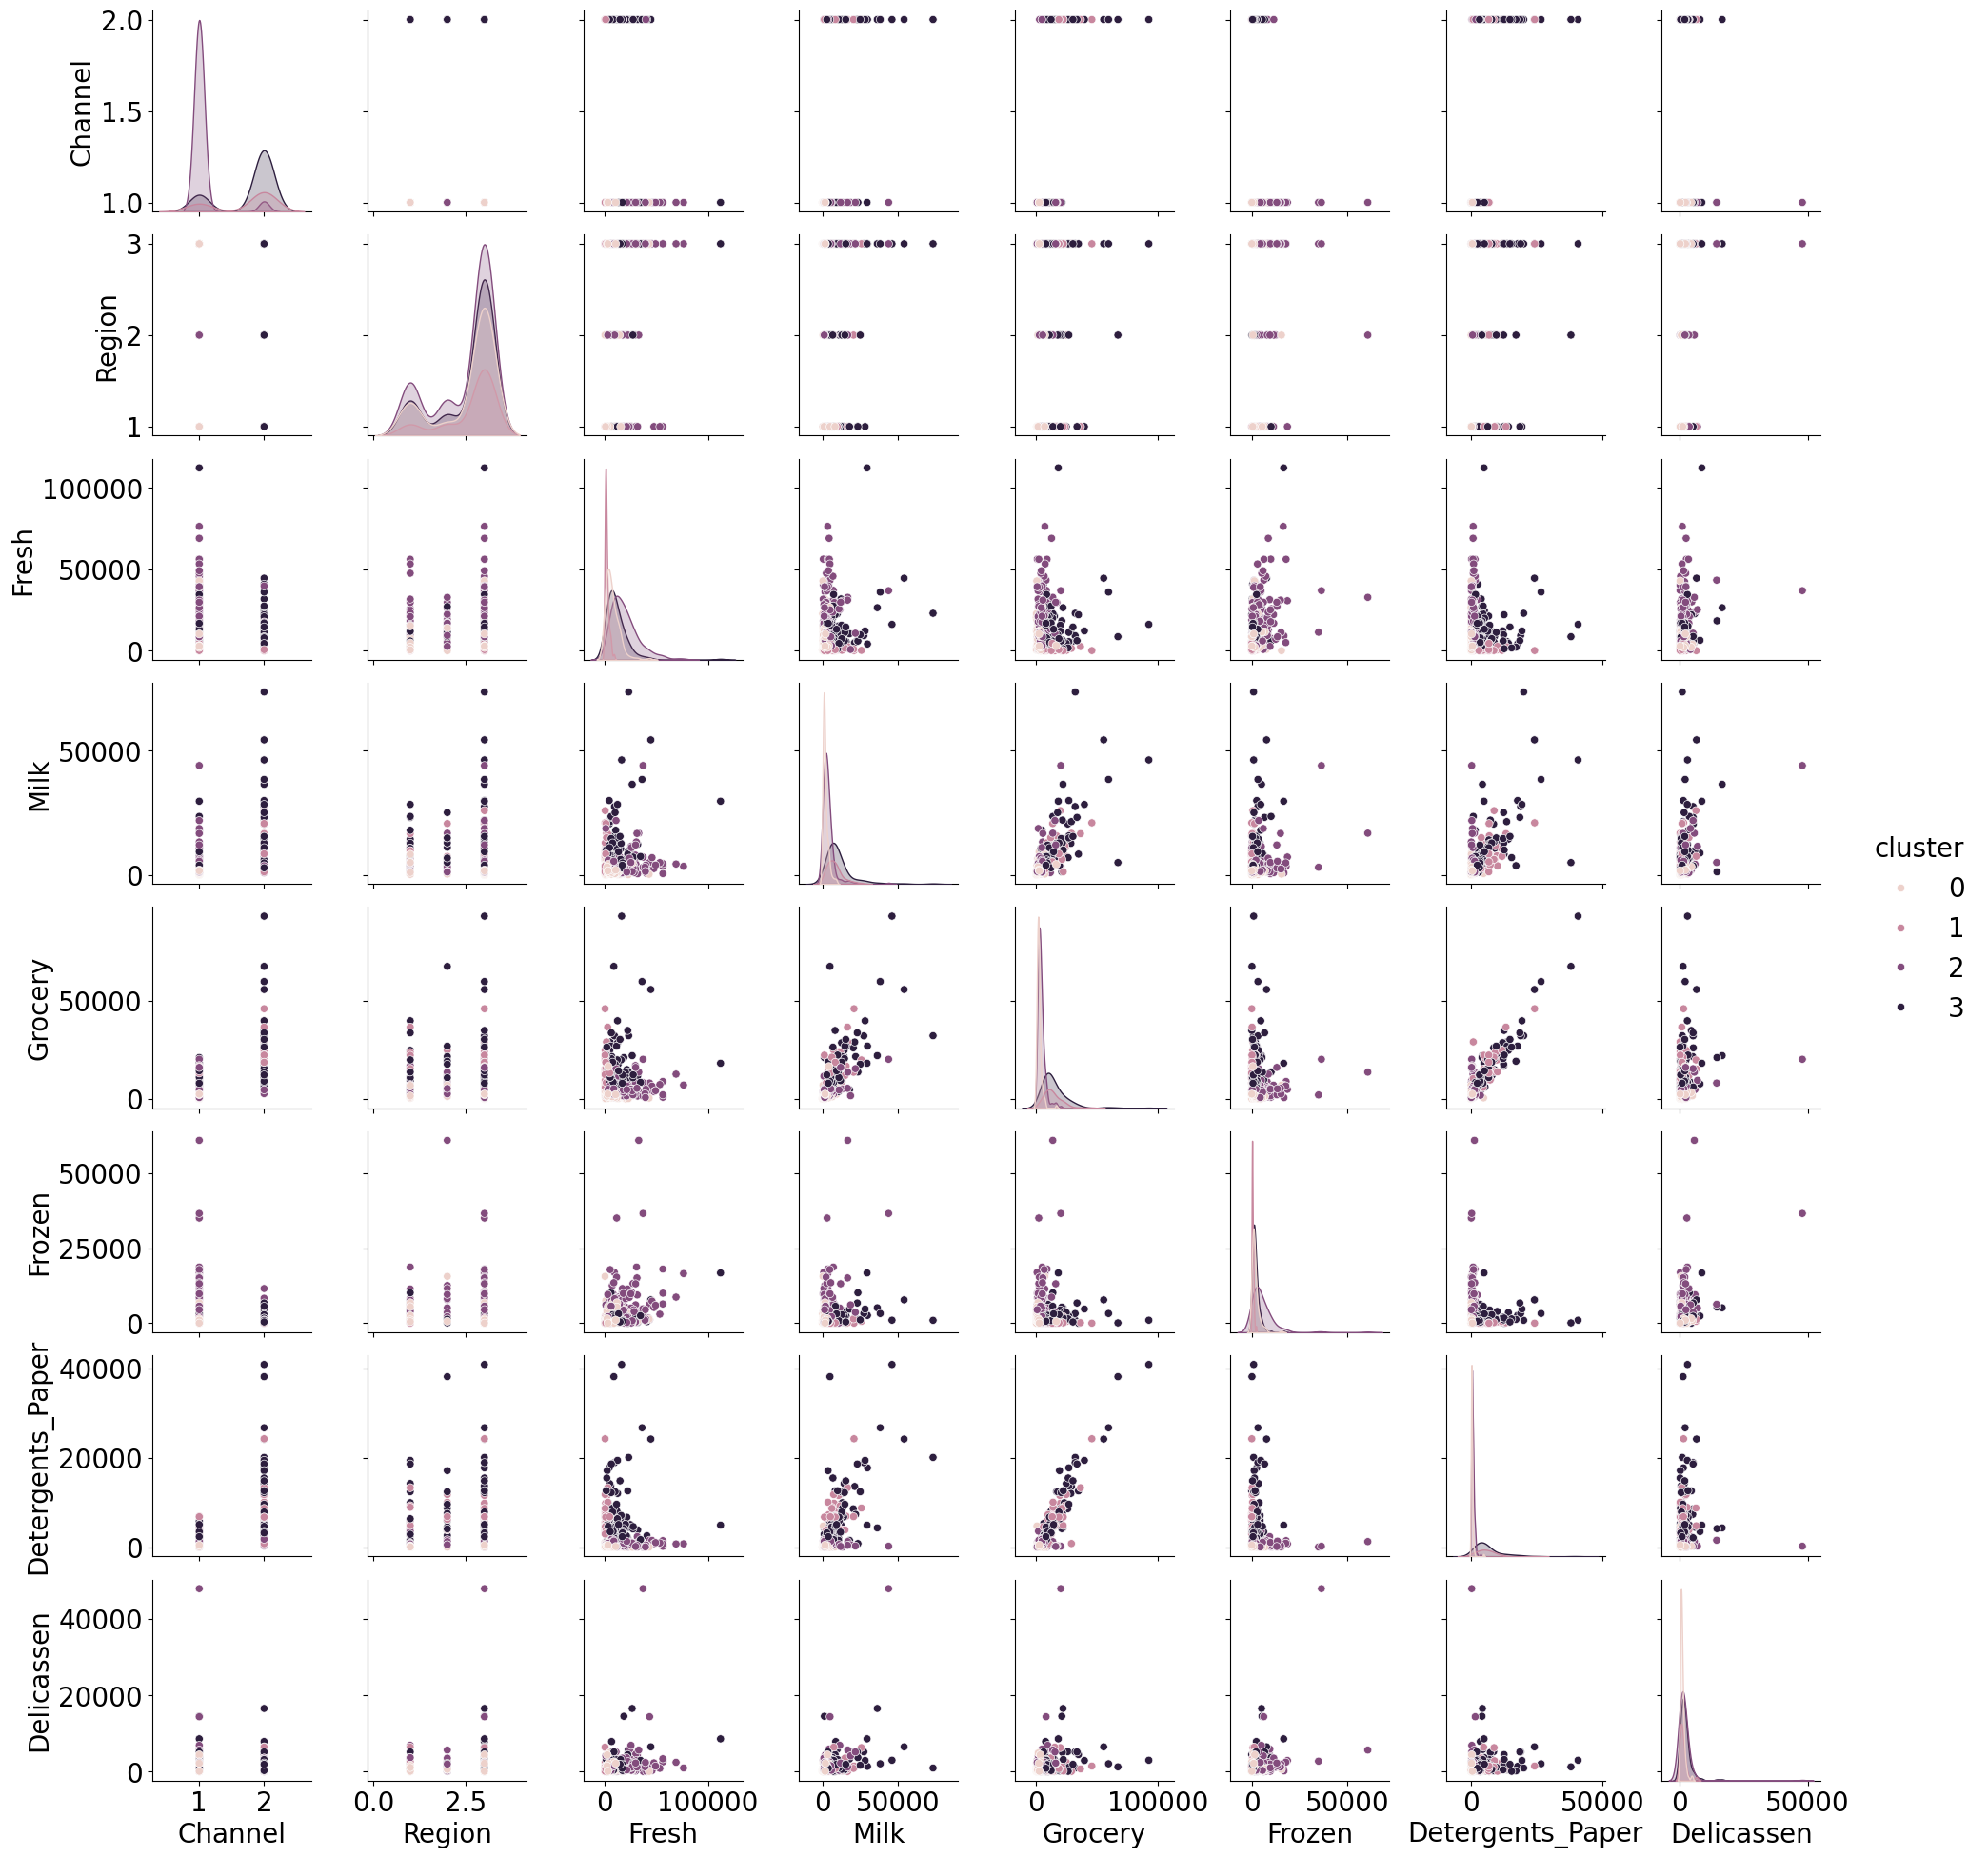

In [64]:
# pairplot
sns.pairplot(data,hue='cluster');

### Problem 13: Advantages and disadvantages of DBSCAN, t-SNE, and LLE

#### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- **Advantages**:
  - Can find arbitrarily shaped clusters.
  - Robust to noise and outliers.
  - Does not require specifying the number of clusters beforehand.
- **Disadvantages**:
  - Sensitive to the choice of parameters (epsilon and min_samples).
  - Struggles with clusters of varying densities.

#### t-SNE (t-distributed Stochastic Neighbor Embedding)
- **Advantages**:
  - Effective in visualizing high-dimensional data in low-dimensional space.
  - Preserves local structure well.
- **Disadvantages**:
  - Non-linear method, so distances in the embedding space may not accurately represent distances in the original space.
  - Computationally expensive, especially for large datasets.

#### LLE (Locally Linear Embedding)
- **Advantages**:
  - Preserves local structure well.
  - Can uncover the underlying manifold structure of the data.
- **Disadvantages**:
  - Sensitivity to the choice of the number of neighbors.
  - Requires careful parameter tuning.
  - Not suitable for high-dimensional data.

### Problem 14: Using t-SNE and DBSCAN

In [65]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [66]:
# Dimensionality reduction using t-SNE
data_embedded = TSNE(n_components=2).fit_transform(data_log)

In [67]:
# Clustering using DBSCAN
ClusteringDBSCAN = DBSCAN(eps=2, min_samples=2).fit(data_embedded)
ClusteringDBSCAN.labels_


array([ 0,  0,  0,  1,  2,  0,  0,  0,  0,  3,  0,  1,  0,  3,  0,  0,  0,
        4,  0,  0,  0,  1,  5,  3,  3,  0,  1,  1,  3,  0,  0,  4,  0,  5,
        4,  0,  6,  3,  0,  1,  5,  0,  0,  0,  0,  3,  3,  3,  0,  3,  1,
        7,  0,  0,  1,  0,  3,  0,  1,  0,  0,  3,  0,  3,  4,  0,  0,  0,
        4,  1,  1, -1,  5,  5,  0,  1,  4,  3,  1,  8, -1,  0,  0,  1,  0,
        3,  3,  5,  1,  5,  1,  1,  3,  1,  0,  0,  0,  9,  9,  1,  3,  0,
        0,  5,  0,  1,  0,  3,  0, 10,  1,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1,  5,  1,  0,  0, 11,  1,  9,  0,  1,  1,  1,
        0,  4,  0,  4,  6, 12, 12,  1,  0,  0,  1,  0,  1,  1,  1,  4,  1,
        4,  9,  0,  0,  1,  0,  0,  0,  1,  1,  3,  0,  3,  0,  7,  1,  1,
        0,  0,  0,  0,  4,  0,  5, 12, 12,  1,  0,  3,  0,  5,  4,  1,  1,
        0,  3,  0,  1,  1,  1,  0,  1,  5,  5,  0,  4,  1,  3,  3,  5,  4,
        1,  0,  1,  0,  0,  3,  1,  3,  1,  0,  0,  0,  0,  1,  0,  1,  1,
        0,  1,  4,  1,  0

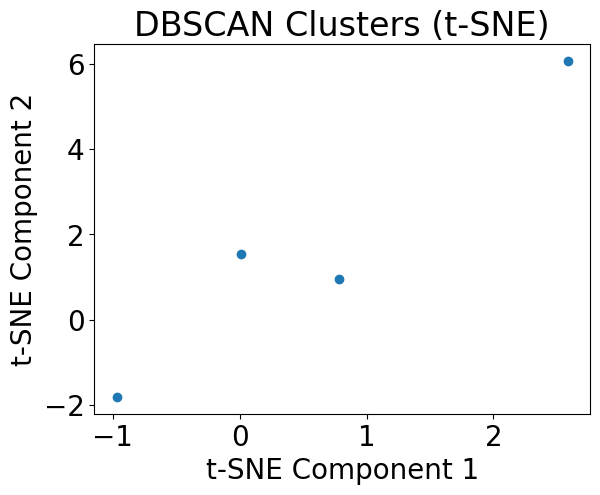

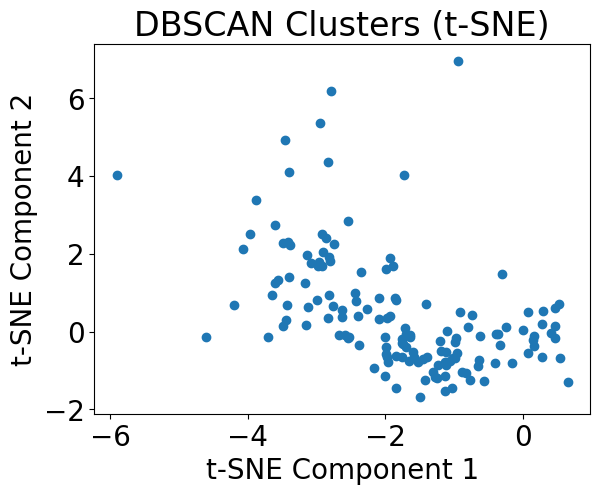

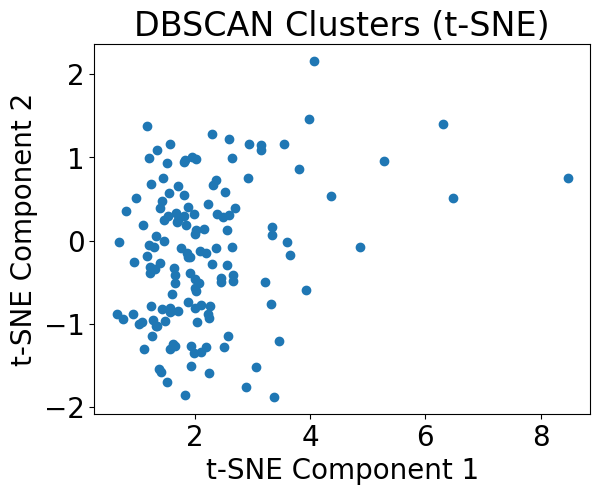

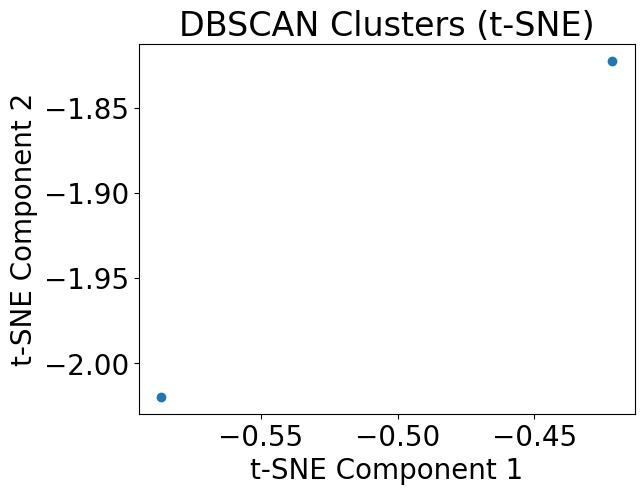

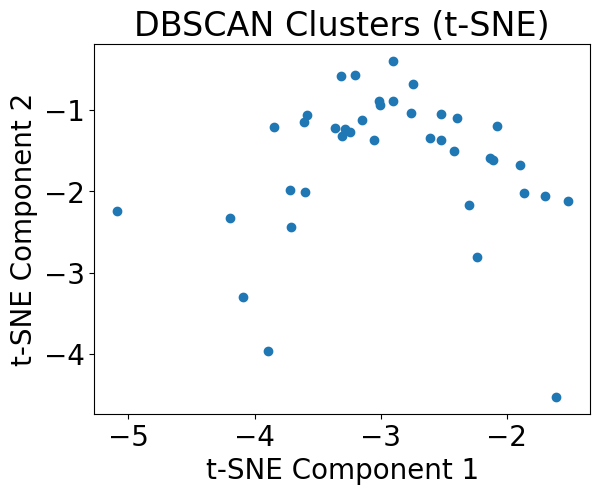

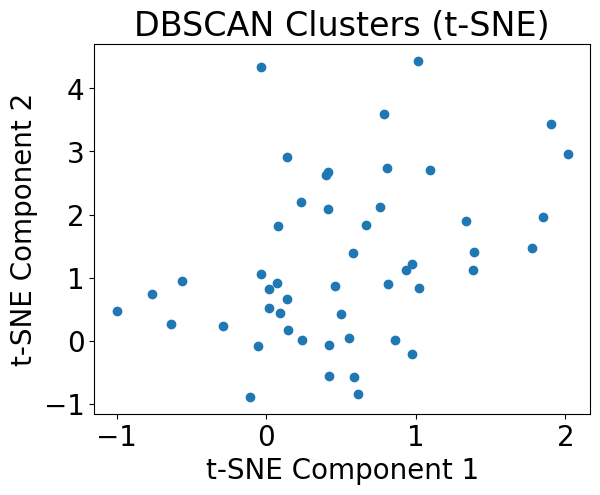

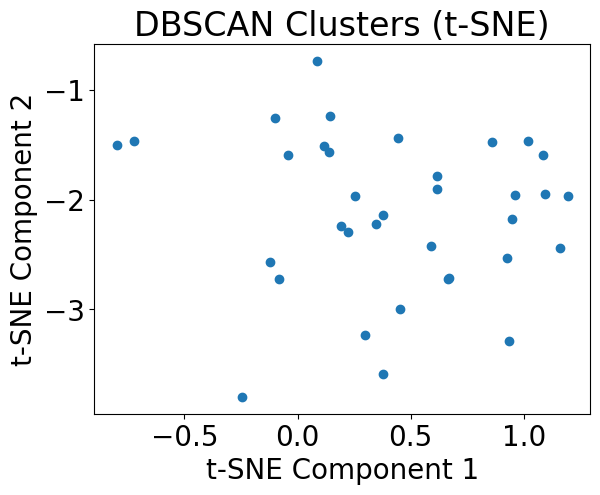

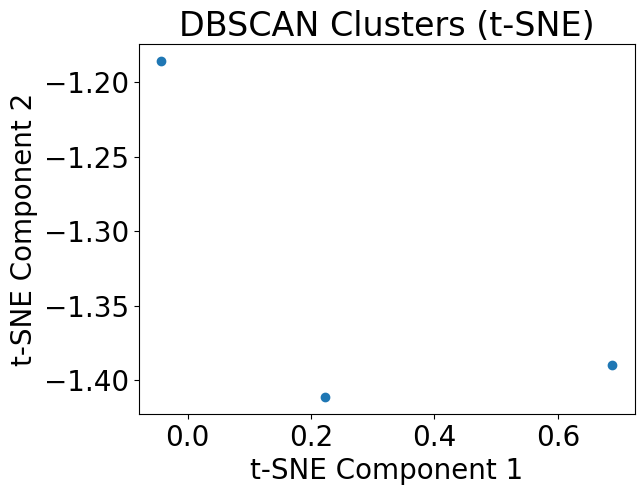

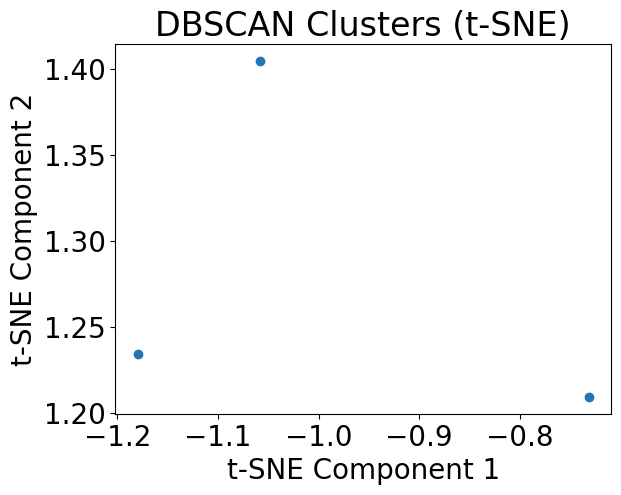

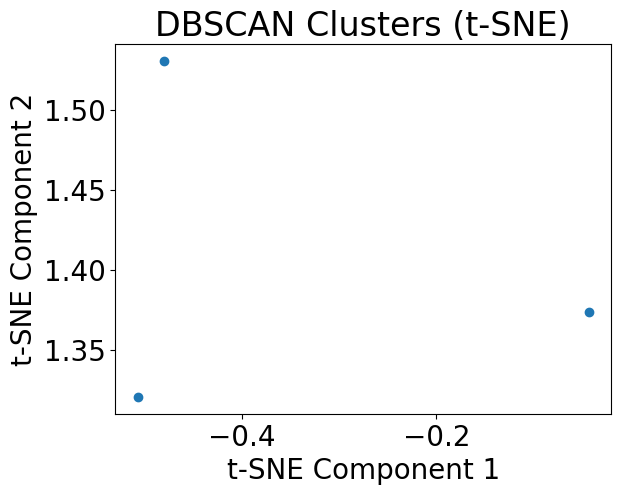

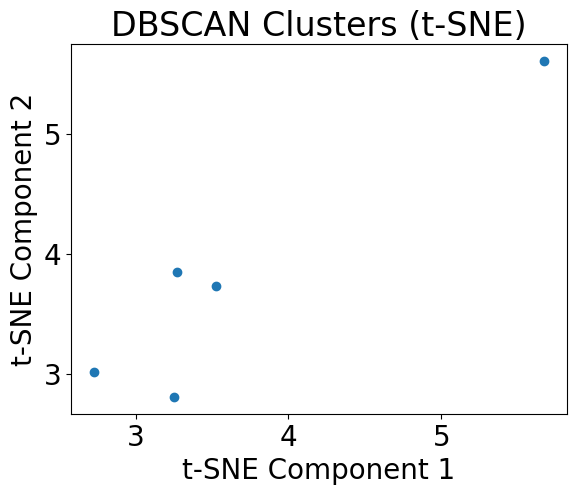

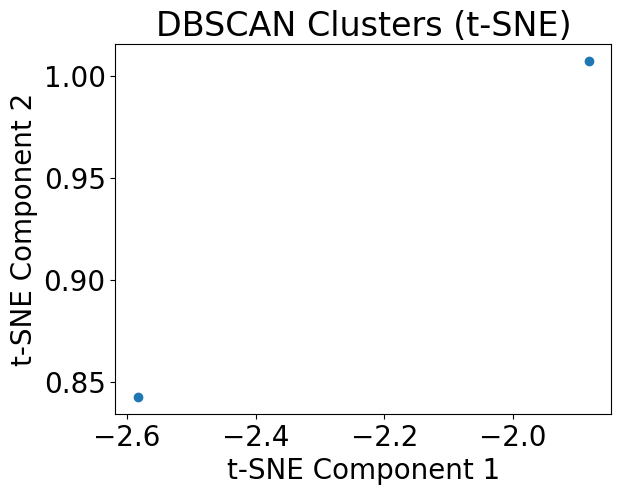

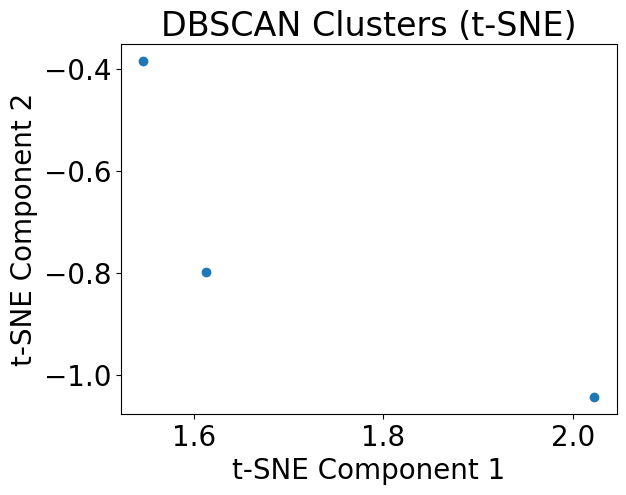

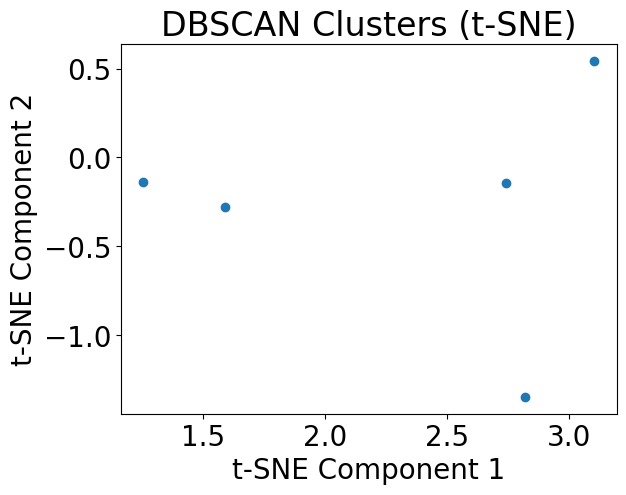

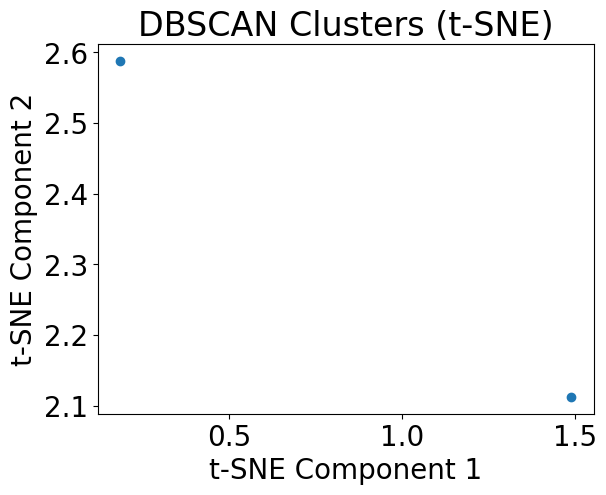

In [68]:
# Visualizing DBSCAN clusters
unique = np.unique(ClusteringDBSCAN.labels_)
for i in unique:
  plt.scatter(data_pca_label_[ClusteringDBSCAN.labels_==i,0],data_pca_label_[ClusteringDBSCAN.labels_==i,1])
  plt.title('DBSCAN Clusters (t-SNE)')
  plt.xlabel('t-SNE Component 1')
  plt.ylabel('t-SNE Component 2')
  plt.show()

##Verified with 2 clusters

In [69]:
# k=2 Clustering

model = ScratchKMeans_speed(n_clusters=2,n_init=100,max_iter=1000,tol=1e-5)
model.fit(data_pca)

# Label value after Clustering
cluster = model.y_kn

# Join to data
data['cluster'] = cluster

data.groupby(['Channel','Region','cluster']).agg(['mean','max','min'])

Fresh                         Milk         \
                                mean     max    min          mean    max   
Channel Region cluster                                                     
1       1      0         4826.454545   11210   1537   9058.272727  23527   
               1        14752.958333   56083    514   2681.270833  11487   
        2      0         1182.000000    1182   1182   3088.000000   3088   
               1        12038.259259   32717      3   2275.222222  16784   
        3      0        10836.281250  112151      3   5701.125000  29627   
               1        14421.832402   76237    190   3091.156425  43950   
2       1      0         4983.625000   20782     18  11599.750000  28326   
               1         6931.000000   11072   2790   4258.000000   5989   
        2      0         6760.166667   27082    161   9649.833333  25071   
               1        16823.000000   16823  16823    928.000000    928   
        3      0         9407.686275   44466     23  11202.019608  73498   
               1        24241.333333   39679  13146   3466.666667   5332   

                                   Grocery                     Frozen         \
                         min          mean    max   min          mean    max   
Channel Region cluster                                                         
1       1      0        1115   7872.909091  15538  2824   2565.363636  10155   
               1         258   3144.583333  16966   489   3256.104167  18711   
        2      0        3088   6114.000000   6114  6114    978.000000    978   
               1         333   4331.851852  13626  1330   5921.592593  60869   
        3      0         997   8401.906250  21042  3268   1693.562500  16745   
               1          55   3079.553073  20170     3   4007.888268  36534   
2       1      0        4737  20100.937500  39694  6089   2036.312500   6746   
               1        2527   5440.000000   5615  5265   6966.500000   8321   
        2      0        1897  17080.944444  67298  5234    984.000000   1840   
               1         928   2743.000000   2743  2743  11559.000000  11559   
        3      0        1275  16244.696078  92780  4602   1450.686275   7782   
               1        1124   6063.666667   8713  4523   3638.666667   8132   

                              Detergents_Paper                Delicassen  \
                          min             mean    max   min         mean   
Channel Region cluster                                                     
1       1      0           91      2746.818182   5828   830  1555.727273   
               1          327       538.875000   4762     5  1114.979167   
        2      0          978       821.000000    821   821  1637.000000   
               1          264       470.185185   1679    15  1086.222222   
        3      0           25      2716.343750   6907   223  1837.500000   
               1           47       441.715084   2381     3  1461.217877   
2       1      0           61      9144.500000  19410  2568  1887.375000   
               1         5612       871.500000    955   788  1748.500000   
        2      0          131      8859.055556  38102  2208  1114.166667   
               1        11559       332.000000    332   332  3486.000000   
        3      0           33      7084.156863  40827   813  1846.784314   
               1         1364       612.000000    764   523  1126.666667   

                                     
                          max   min  
Channel Region cluster               
1       1      0         3636   239  
               1         6854     7  
        2      0         1637  1637  
               1         5609    51  
        3      0        14472     3  
               1        47943     3  
2       1      0         6372   120  
               1         2137  1360  
        2      0         3508    59  
               1         3486  3486  
        3      0        16523     3  
               1

In [70]:
data.groupby(['Channel','cluster']).mean()

Region         Fresh          Milk       Grocery  \
Channel cluster                                                       
1       0        2.477273   9114.409091   6481.022727   8217.659091   
        1        2.515748  14231.035433   2926.964567   3224.960630   
2       0        2.632353   8536.801471  11043.375000  16809.051471   
        1        2.166667  17234.833333   3307.333333   5302.333333   

                      Frozen  Detergents_Paper   Delicassen  
Channel cluster                                              
1       0        1895.250000       2680.886364  1762.500000  
        1        4069.244094        463.102362  1355.925197  
2       0        1457.816176       7561.463235  1754.595588  
        1        6068.000000        651.833333  1727.166667

In [71]:
data.groupby(['Region','cluster']).mean()

Channel         Fresh          Milk       Grocery  \
Region cluster                                                       
1      0        1.592593   4919.592593  10564.333333  15119.148148   
       1        1.040000  14440.080000   2744.340000   3236.400000   
2      0        1.947368   6466.578947   9304.473684  16503.736842   
       1        1.035714  12209.142857   2227.107143   4275.107143   
3      0        1.761194   9748.843284   9888.373134  14371.791045   
       1        1.016484  14583.692308   3097.346154   3128.741758   

                     Frozen  Detergents_Paper   Delicassen  
Region cluster                                              
1      0        2251.851852       6538.037037  1752.259259  
       1        3404.520000        552.180000  1140.320000  
2      0         983.684211       8436.000000  1141.684211  
       1        6122.928571        465.250000  1171.928571  
3      0        1508.686567       6041.097015  1844.567164  
       1        4001.802198        444.521978  1455.703297

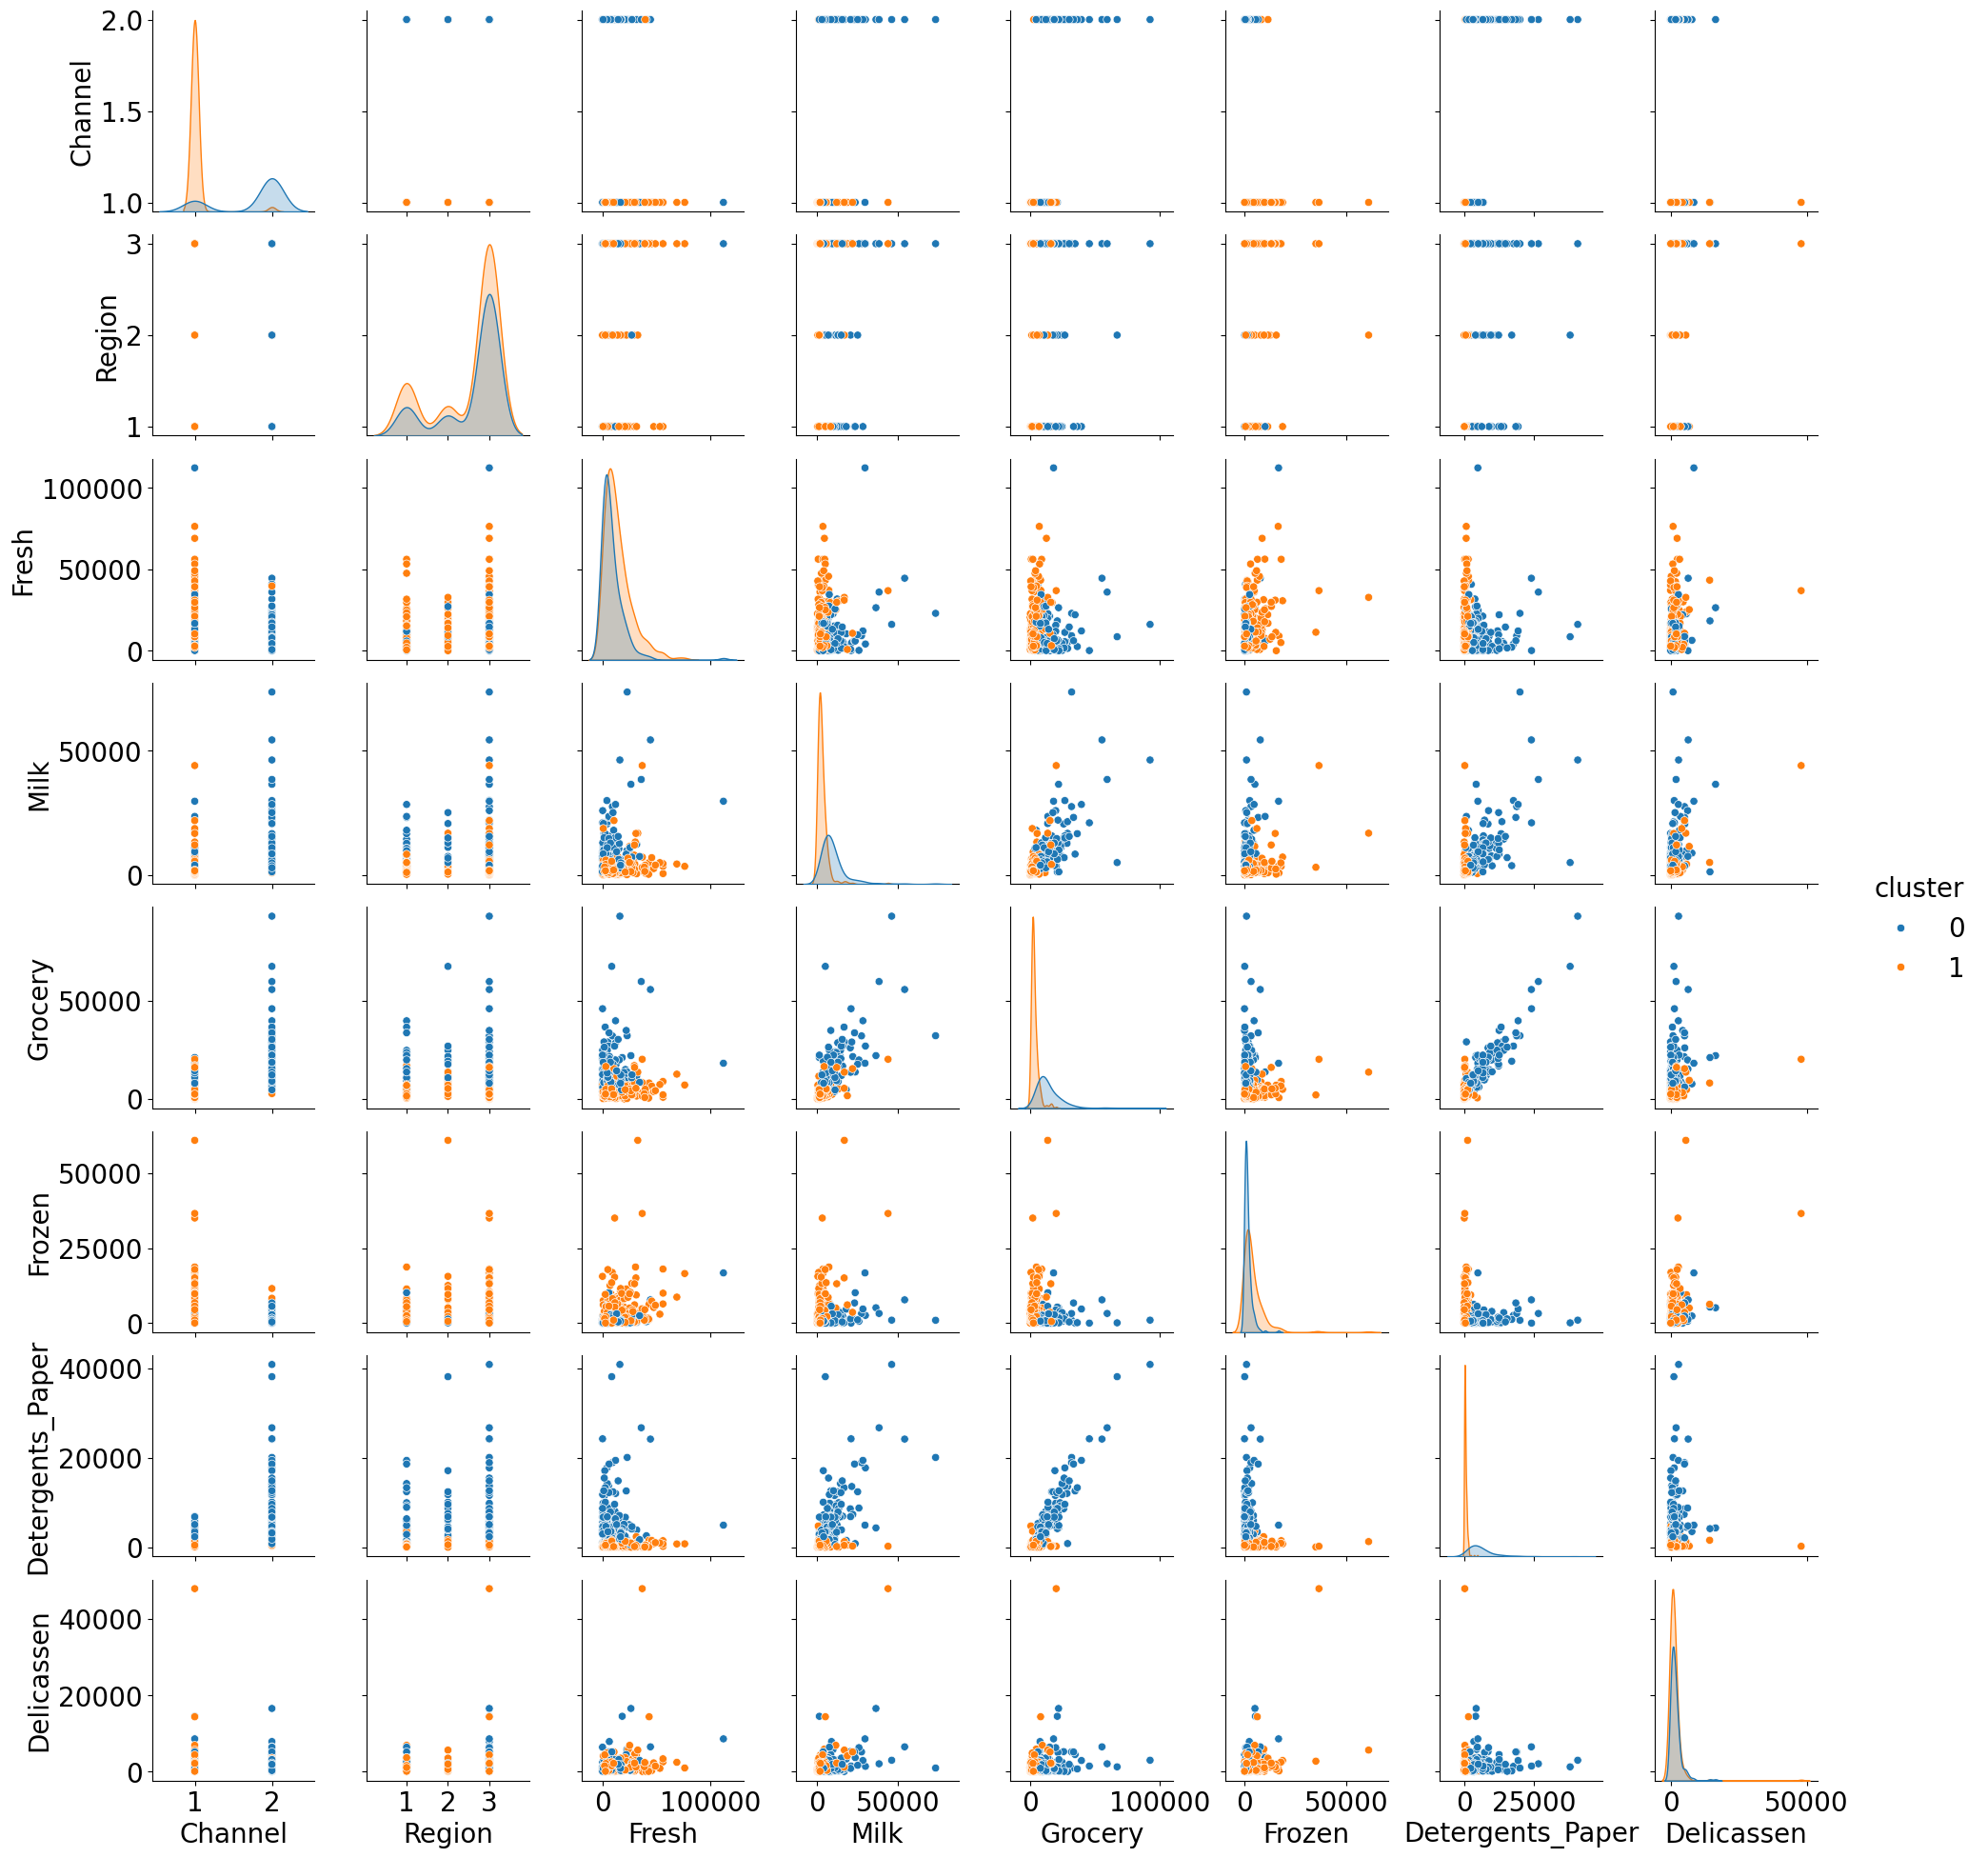

In [73]:
# pairplot
sns.pairplot(data,hue='cluster');